### Prerequsite - Upgrade Scikit Learn
The current workspace has scikit-learn v0.19.1 installed. However, you can upgrade scikit-learn to 0.24.x. and use this [OneHotEncoder](https://scikit-learn.org/0.21/modules/generated/sklearn.preprocessing.OneHotEncoder.html) library. 


In [65]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.6.1.


In [66]:
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

In [67]:
# Restart the Kernel. 
#from IPython.display import display, Javascript

#def restart_kernel():
#    display(Javascript('IPython.notebook.kernel.restart()'))

#restart_kernel()

In [68]:
"""
!python -m pip install --upgrade scikit-learn
import sklearn
import os
print('The scikit-learn version is {}.'.format(sklearn.__version__))

!pip install --upgrade pandas
import pandas as pd
print(pd.__version__)

!pip install --upgrade numpy
import numpy as np
print(np.__version__)

# Update visualization libraries
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install --upgrade plotly
!pip install --upgrade missingno

# Similarly, should you need any other package, they can install it as:
!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'
"""

"\n!python -m pip install --upgrade scikit-learn\nimport sklearn\nimport os\nprint('The scikit-learn version is {}.'.format(sklearn.__version__))\n\n!pip install --upgrade pandas\nimport pandas as pd\nprint(pd.__version__)\n\n!pip install --upgrade numpy\nimport numpy as np\nprint(np.__version__)\n\n# Update visualization libraries\n!pip install --upgrade matplotlib\n!pip install --upgrade seaborn\n!pip install --upgrade plotly\n!pip install --upgrade missingno\n\n# Similarly, should you need any other package, they can install it as:\n!python -m pip install 'tensorflow-tensorboard<0.2.0,>=0.1.0'\n"

In [69]:
# Now you can import and use OneHotEncoder

# your code goes here
from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder(sparse=False)


# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [71]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''
#pd.options.display.max_rows = None
#pd.options.display.max_columns = None

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [73]:
# Load in the general demographics data.

all_data = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ";")

# Load in the feature summary file.
summary_data = pd.read_csv('AZDIAS_Feature_Summary.csv', sep =";")

In [74]:
display(summary_data.head())
display(all_data.head())


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [75]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
print("All demographics data shape is:", all_data.shape)
print("Feature summary data shape is:", summary_data.shape)
print("\n")

all_data.info()
print("\n")
summary_data.info()


All demographics data shape is: (891221, 85)
Feature summary data shape is: (85, 4)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   AGER_TYP               891221 non-null  int64  
 1   ALTERSKATEGORIE_GROB   891221 non-null  int64  
 2   ANREDE_KZ              891221 non-null  int64  
 3   CJT_GESAMTTYP          886367 non-null  float64
 4   FINANZ_MINIMALIST      891221 non-null  int64  
 5   FINANZ_SPARER          891221 non-null  int64  
 6   FINANZ_VORSORGER       891221 non-null  int64  
 7   FINANZ_ANLEGER         891221 non-null  int64  
 8   FINANZ_UNAUFFAELLIGER  891221 non-null  int64  
 9   FINANZ_HAUSBAUER       891221 non-null  int64  
 10  FINANZTYP              891221 non-null  int64  
 11  GEBURTSJAHR            891221 non-null  int64  
 12  GFK_URLAUBERTYP        886367 non-null  float64
 13  GRE

> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [77]:
import missingno as msno
import matplotlib.pyplot as plt

<Figure size 1000x2000 with 0 Axes>

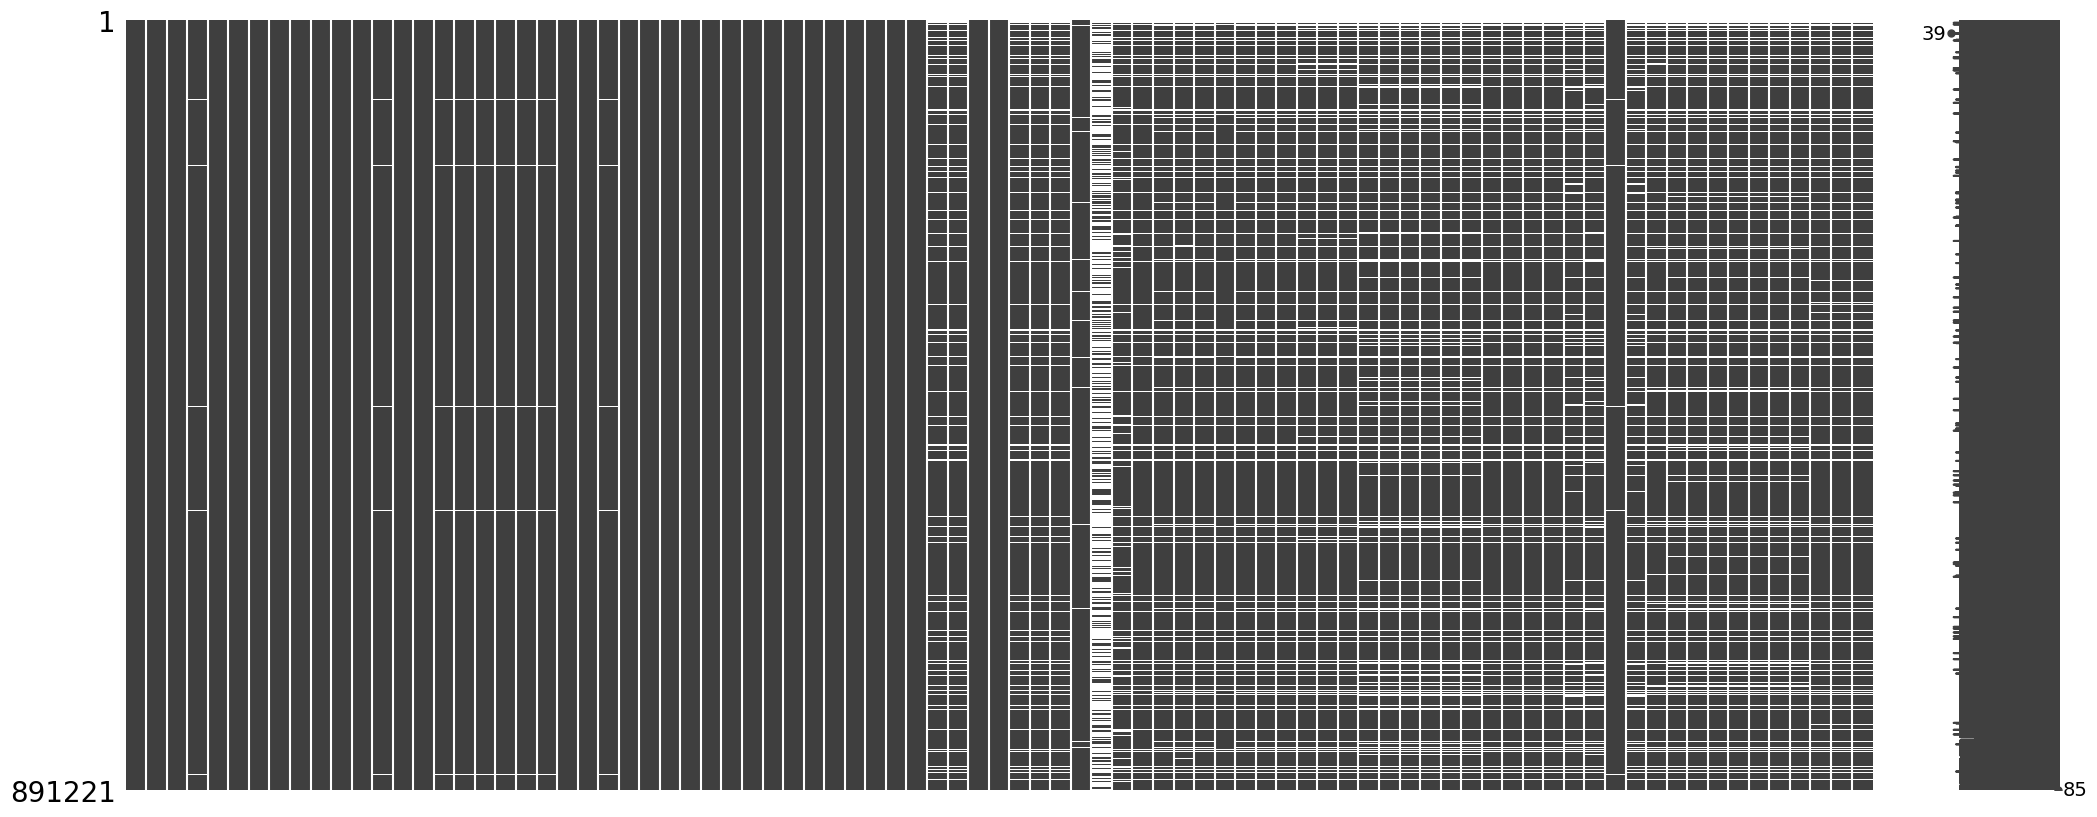

<Axes: >

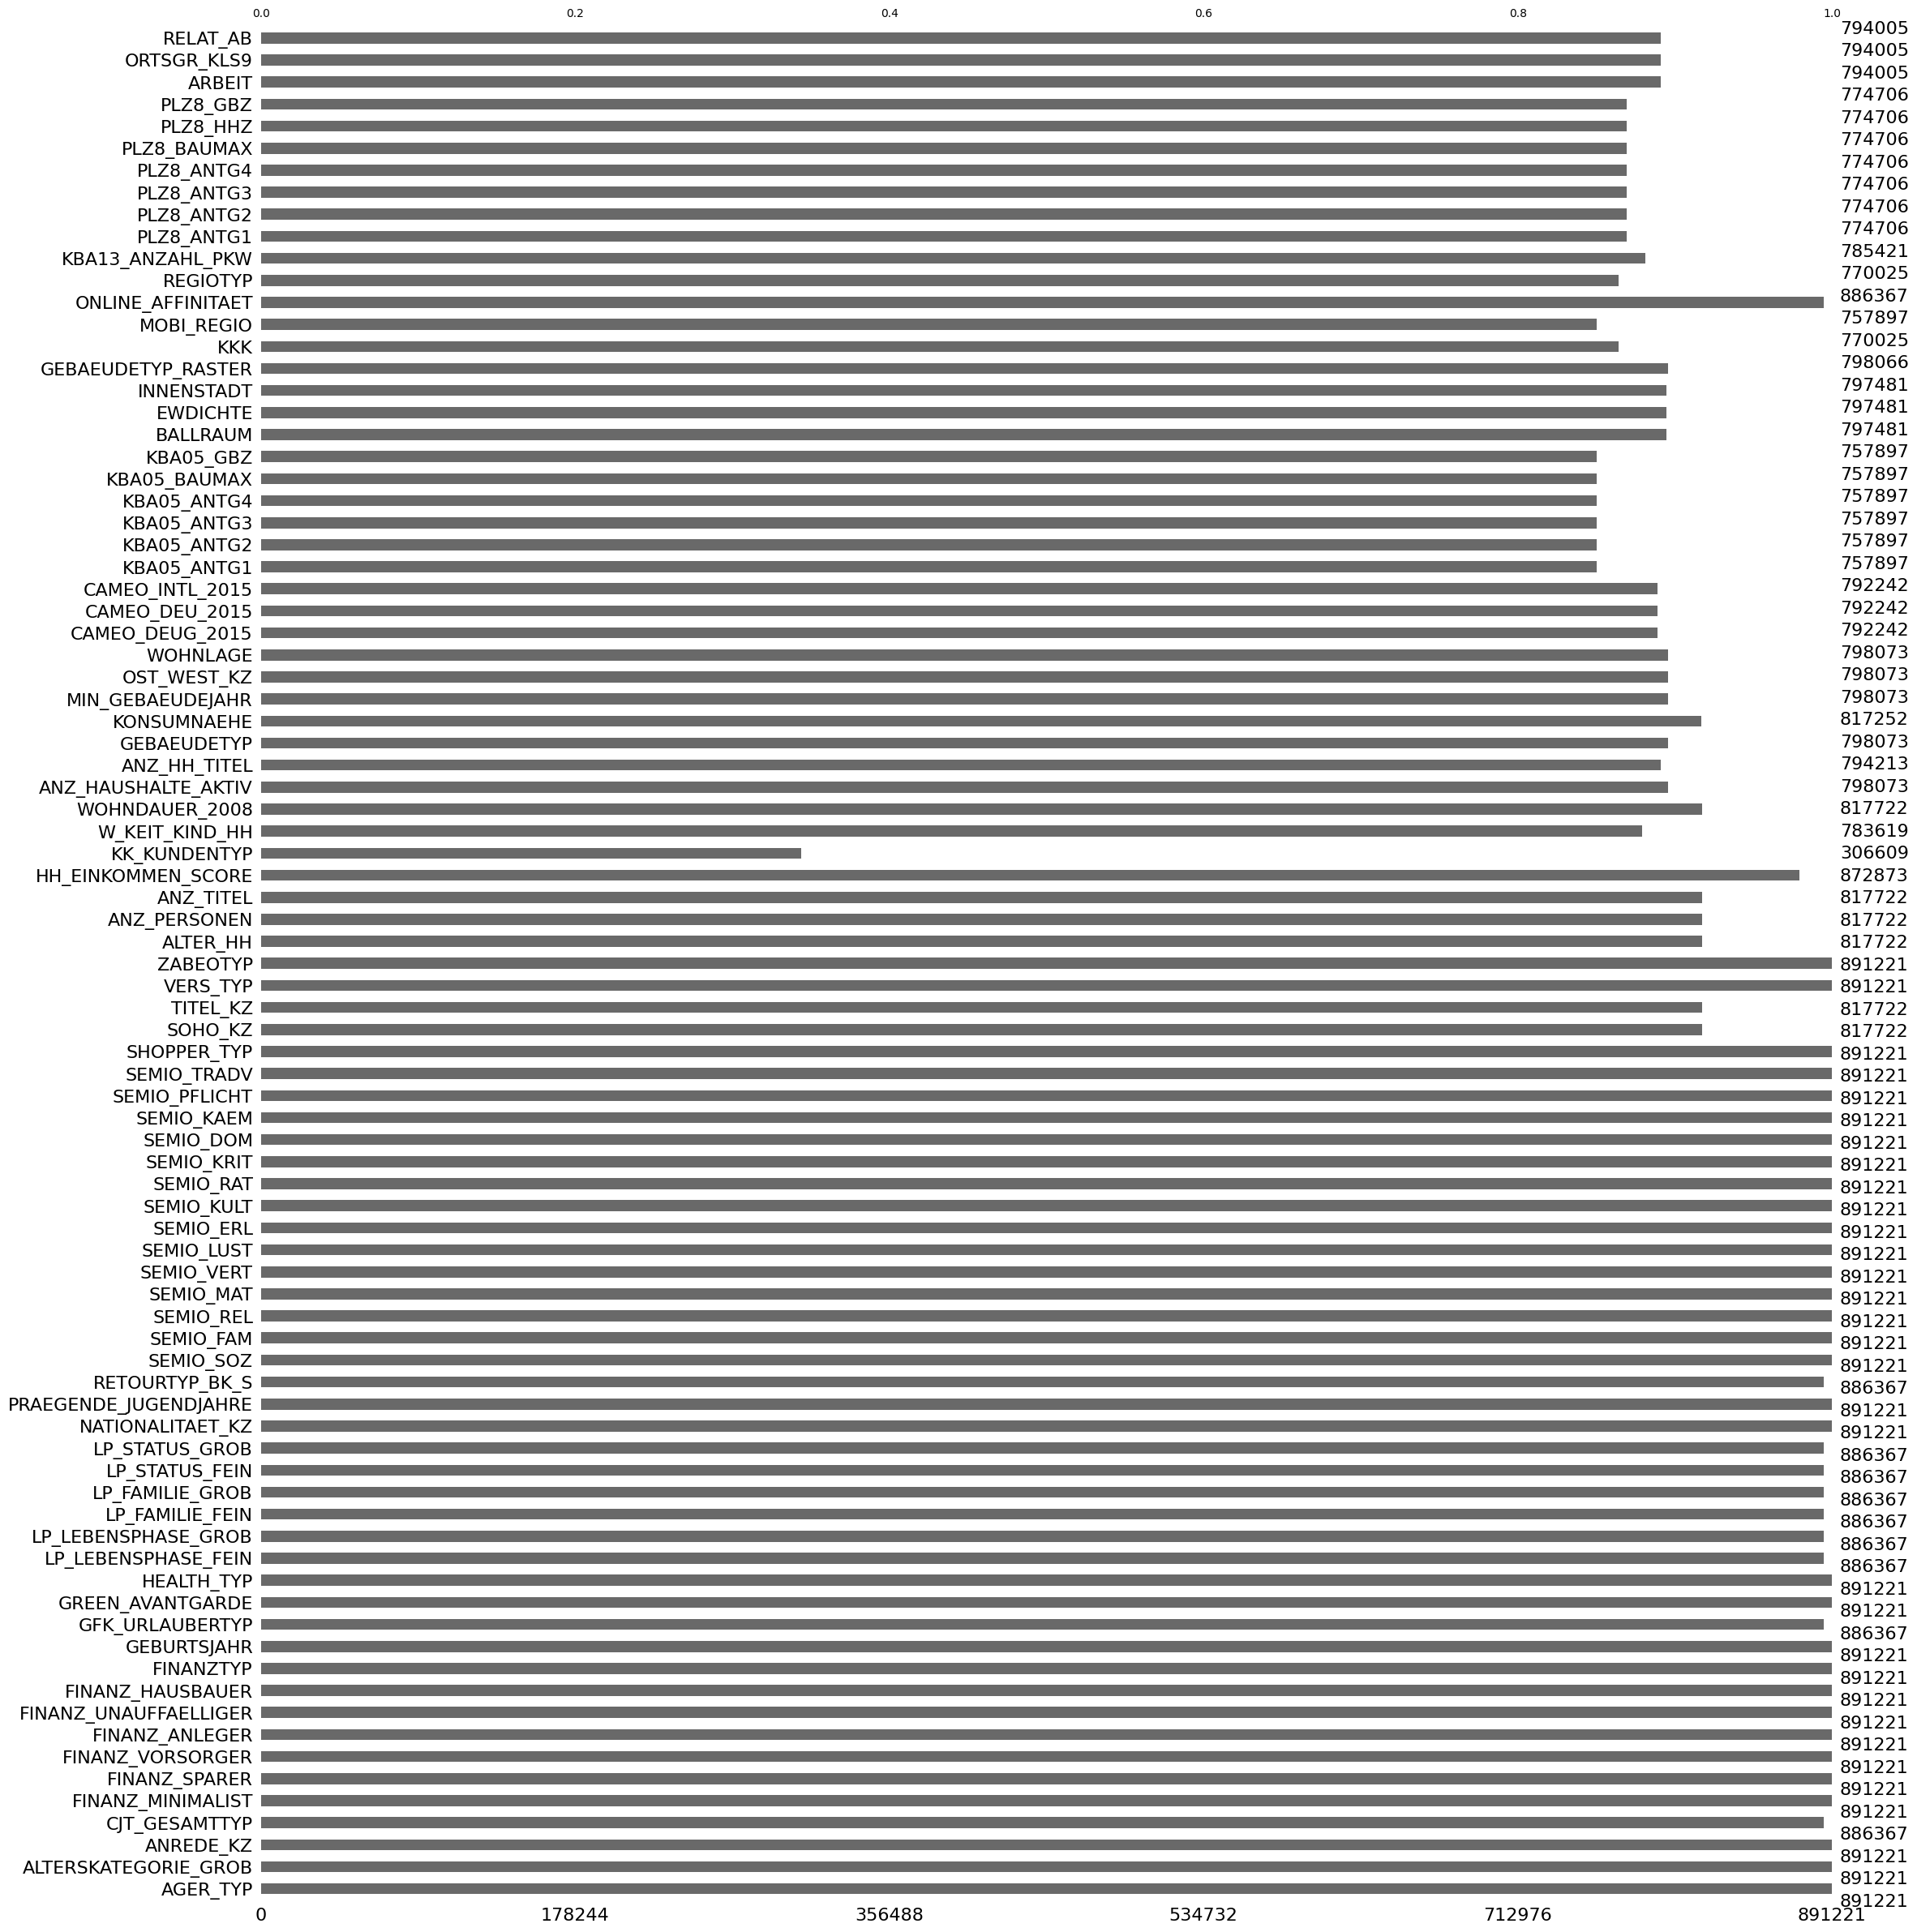

In [78]:
# Visualize missing data

plt.figure(figsize=(10,20))
msno.matrix(all_data)
plt.show()

plt.figure(figsize=(10,200))
msno.bar(all_data)


In [79]:
# Identify missing or unknown data values and convert them to NaNs.


print("Missing values report for all demographics file: \n")
miss_count = all_data.isnull().sum()
total_miss_count = all_data.isna().sum().sum()
print(f"Total missing values for demographics = {total_miss_count} = {total_miss_count/(all_data.shape[0]*all_data.shape[1]):.2f}% of total values")
print(miss_count)


Missing values report for all demographics file: 

Total missing values for demographics = 4896838 = 0.06% of total values
AGER_TYP                     0
ALTERSKATEGORIE_GROB         0
ANREDE_KZ                    0
CJT_GESAMTTYP             4854
FINANZ_MINIMALIST            0
                         ...  
PLZ8_HHZ                116515
PLZ8_GBZ                116515
ARBEIT                   97216
ORTSGR_KLS9              97216
RELAT_AB                 97216
Length: 85, dtype: int64


In [80]:
#Here we exctract the list of all the missing and uknown codes

import ast


def try_convert(value):
    """Convert string values to numbers if they represent a number."""
    try:
        return int(value) if '.' not in value else float(value)
    except ValueError:
        return value  # If it's not a number, return as string


def try_eval(value):
    try:
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        # If it's not a valid literal, check if it looks like a list
        if isinstance(value, str) and value.startswith('[') and value.endswith(']'):
            # Remove the brackets and split by comma, then return as a list
            cleaned_value = value[1:-1]  # Remove leading '[' and trailing ']'
            return [try_convert(item.strip()) for item in cleaned_value.split(',')]  # Split by comma and strip spaces


last_column_as_list = summary_data['missing_or_unknown'].apply(try_eval)
print(last_column_as_list, "\n")

for index, element in enumerate(last_column_as_list):
    print(f"Element at index {index}: {element} - Type: {type(element)}")


0        [-1, 0]
1     [-1, 0, 9]
2        [-1, 0]
3            [0]
4           [-1]
         ...    
80          [-1]
81          [-1]
82       [-1, 9]
83       [-1, 0]
84       [-1, 9]
Name: missing_or_unknown, Length: 85, dtype: object 

Element at index 0: [-1, 0] - Type: <class 'list'>
Element at index 1: [-1, 0, 9] - Type: <class 'list'>
Element at index 2: [-1, 0] - Type: <class 'list'>
Element at index 3: [0] - Type: <class 'list'>
Element at index 4: [-1] - Type: <class 'list'>
Element at index 5: [-1] - Type: <class 'list'>
Element at index 6: [-1] - Type: <class 'list'>
Element at index 7: [-1] - Type: <class 'list'>
Element at index 8: [-1] - Type: <class 'list'>
Element at index 9: [-1] - Type: <class 'list'>
Element at index 10: [-1] - Type: <class 'list'>
Element at index 11: [0] - Type: <class 'list'>
Element at index 12: [] - Type: <class 'list'>
Element at index 13: [] - Type: <class 'list'>
Element at index 14: [-1, 0] - Type: <class 'list'>
Element at index 15: [0] 

In [81]:
#Here we Replace the missing or unknown values with NANs. 

keys = summary_data['attribute']  # First column (keys)
values = last_column_as_list         # List of values


# Create the dictionary using zip to pair the keys with values
feature_dict = dict(zip(keys, values))

# Check the dictionary
print(feature_dict,"\n")
 
all_data2 = all_data.replace(feature_dict, np.nan)


{'AGER_TYP': [-1, 0], 'ALTERSKATEGORIE_GROB': [-1, 0, 9], 'ANREDE_KZ': [-1, 0], 'CJT_GESAMTTYP': [0], 'FINANZ_MINIMALIST': [-1], 'FINANZ_SPARER': [-1], 'FINANZ_VORSORGER': [-1], 'FINANZ_ANLEGER': [-1], 'FINANZ_UNAUFFAELLIGER': [-1], 'FINANZ_HAUSBAUER': [-1], 'FINANZTYP': [-1], 'GEBURTSJAHR': [0], 'GFK_URLAUBERTYP': [], 'GREEN_AVANTGARDE': [], 'HEALTH_TYP': [-1, 0], 'LP_LEBENSPHASE_FEIN': [0], 'LP_LEBENSPHASE_GROB': [0], 'LP_FAMILIE_FEIN': [0], 'LP_FAMILIE_GROB': [0], 'LP_STATUS_FEIN': [0], 'LP_STATUS_GROB': [0], 'NATIONALITAET_KZ': [-1, 0], 'PRAEGENDE_JUGENDJAHRE': [-1, 0], 'RETOURTYP_BK_S': [0], 'SEMIO_SOZ': [-1, 9], 'SEMIO_FAM': [-1, 9], 'SEMIO_REL': [-1, 9], 'SEMIO_MAT': [-1, 9], 'SEMIO_VERT': [-1, 9], 'SEMIO_LUST': [-1, 9], 'SEMIO_ERL': [-1, 9], 'SEMIO_KULT': [-1, 9], 'SEMIO_RAT': [-1, 9], 'SEMIO_KRIT': [-1, 9], 'SEMIO_DOM': [-1, 9], 'SEMIO_KAEM': [-1, 9], 'SEMIO_PFLICHT': [-1, 9], 'SEMIO_TRADV': [-1, 9], 'SHOPPER_TYP': [-1], 'SOHO_KZ': [-1], 'TITEL_KZ': [-1, 0], 'VERS_TYP': [-1], 

In [82]:
# check how many X, XX, missing values we have on each column to check if we replaced everything

counts = {}

# Iterate over each column in the DataFrame
for column in all_data2.columns:
    x_count = all_data2[column].apply(lambda x: str(x).strip()).value_counts().get('X', 0)
    xx_count = all_data2[column].apply(lambda x: str(x).strip()).value_counts().get('XX', 0)
    zero_count = all_data2[column].apply(lambda x: str(x).strip()).value_counts().get('0', 0)
    minus1_count = all_data2[column].apply(lambda x: str(x).strip()).value_counts().get('-1', 0)
    nan_count = all_data2[column].isna().sum()

    counts[column] = {'X': x_count, 'XX': xx_count, '0': zero_count, '-1': minus1_count, 'Nan': nan_count}


# Convert the counts to a DataFrame for easier inspection
counts_df = pd.DataFrame(counts).T  # Transpose to have columns as rows


# Display the counts
print(counts_df)


                      X  XX  0  -1     Nan
AGER_TYP              0   0  0   0  685843
ALTERSKATEGORIE_GROB  0   0  0   0    2881
ANREDE_KZ             0   0  0   0       0
CJT_GESAMTTYP         0   0  0   0    4854
FINANZ_MINIMALIST     0   0  0   0       0
...                  ..  .. ..  ..     ...
PLZ8_HHZ              0   0  0   0  116515
PLZ8_GBZ              0   0  0   0  116515
ARBEIT                0   0  0   0   97375
ORTSGR_KLS9           0   0  0   0   97274
RELAT_AB              0   0  0   0   97375

[85 rows x 5 columns]


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [84]:
# Perform an assessment of how much missing data there is in each column of the
# dataset before replacements with Nans.

print("Missing values report for all demographics file: \n")
miss_count = all_data2.isnull().sum()
total_miss_count = all_data2.isna().sum().sum()
miss_proportion = all_data2.isna().mean()

print(f"Total missing values for demographics = {total_miss_count} = {total_miss_count/(all_data2.shape[0]*all_data2.shape[1]):.2f}% of total values \n")

missing_df = miss_proportion.reset_index()
missing_df.columns = ['attribute', 'Missing_Proportion']
missing_df = missing_df.sort_values(by='Missing_Proportion', ascending=False)

print(missing_df)


Missing values report for all demographics file: 

Total missing values for demographics = 8373929 = 0.11% of total values 

        attribute  Missing_Proportion
40       TITEL_KZ            0.997576
0        AGER_TYP            0.769554
47   KK_KUNDENTYP            0.655967
64   KBA05_BAUMAX            0.534687
11    GEBURTSJAHR            0.440203
..            ...                 ...
32      SEMIO_RAT            0.000000
33     SEMIO_KRIT            0.000000
34      SEMIO_DOM            0.000000
36  SEMIO_PFLICHT            0.000000
28     SEMIO_VERT            0.000000

[85 rows x 2 columns]


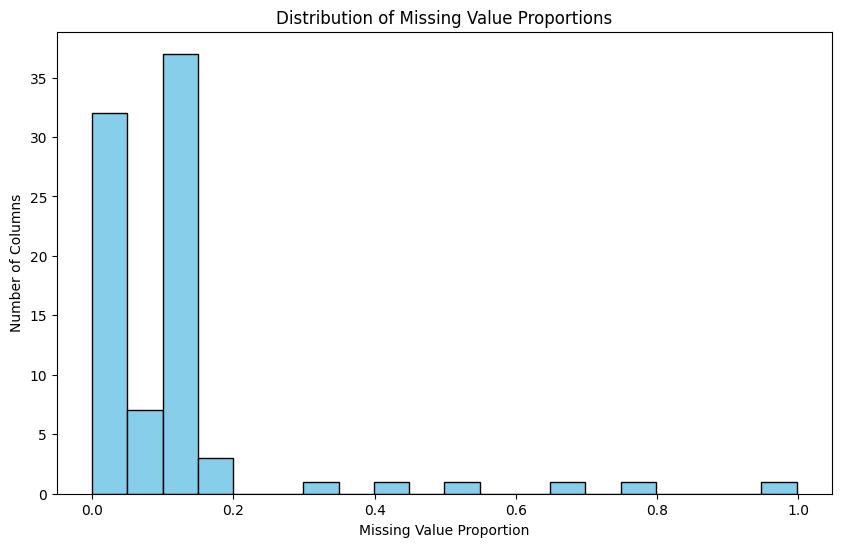

<Figure size 1000x2000 with 0 Axes>

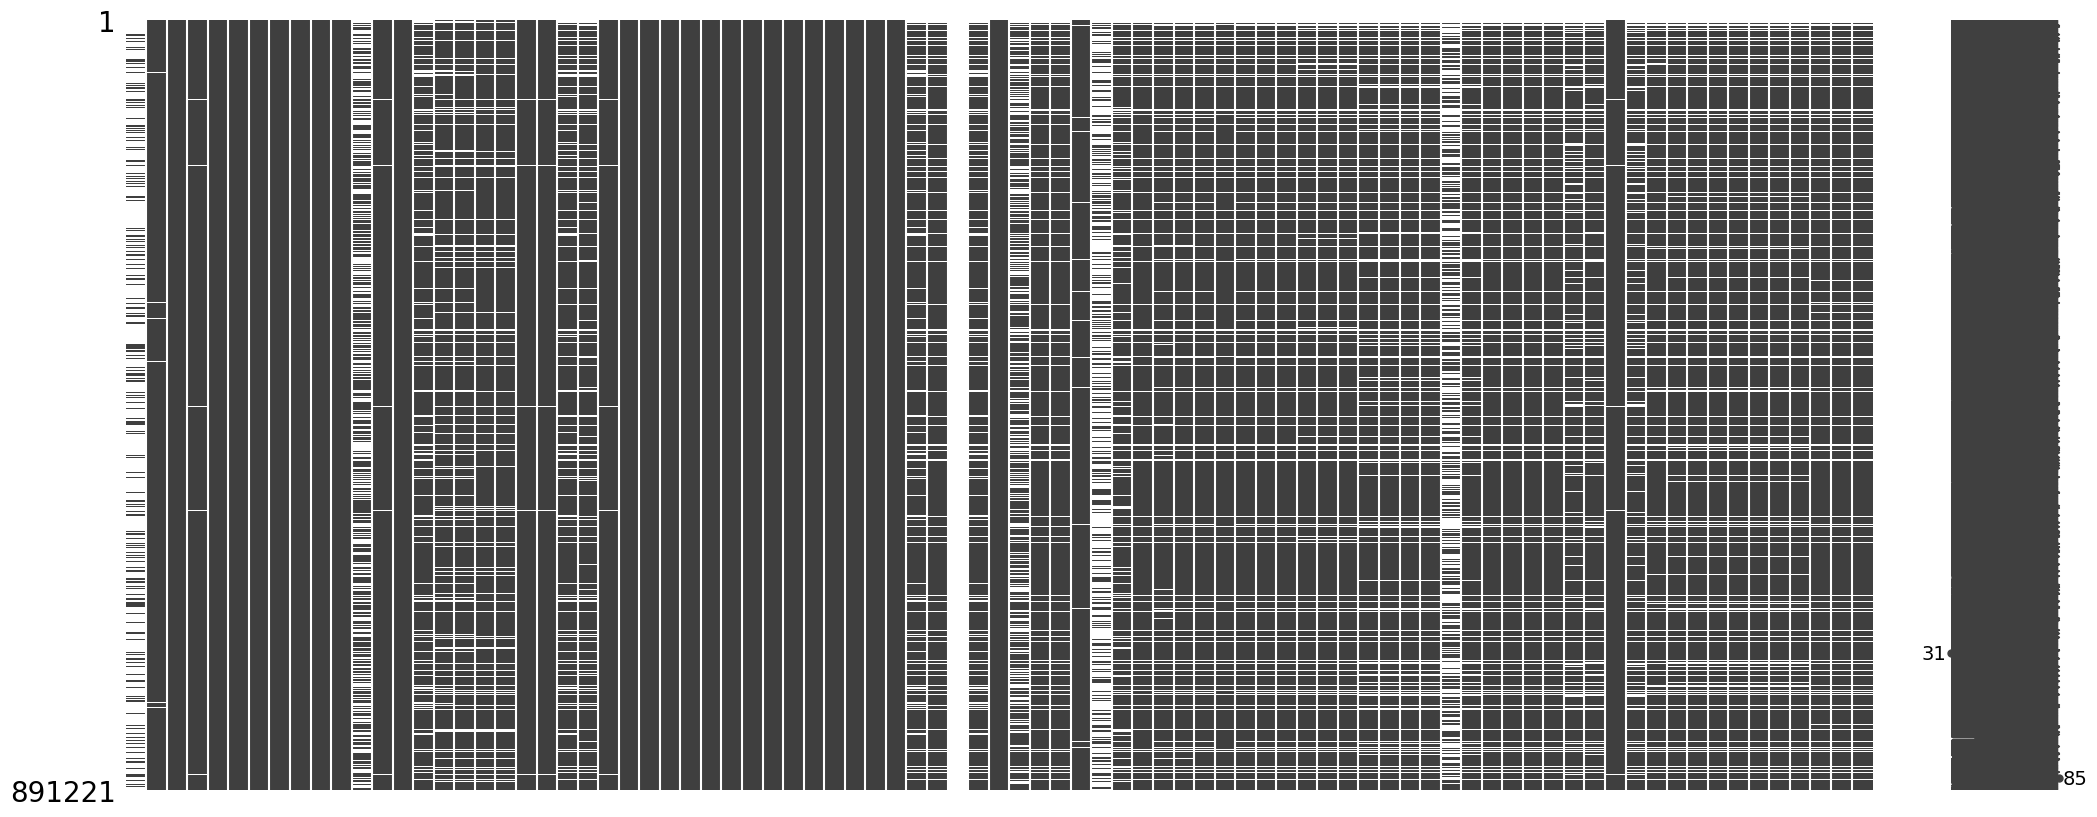

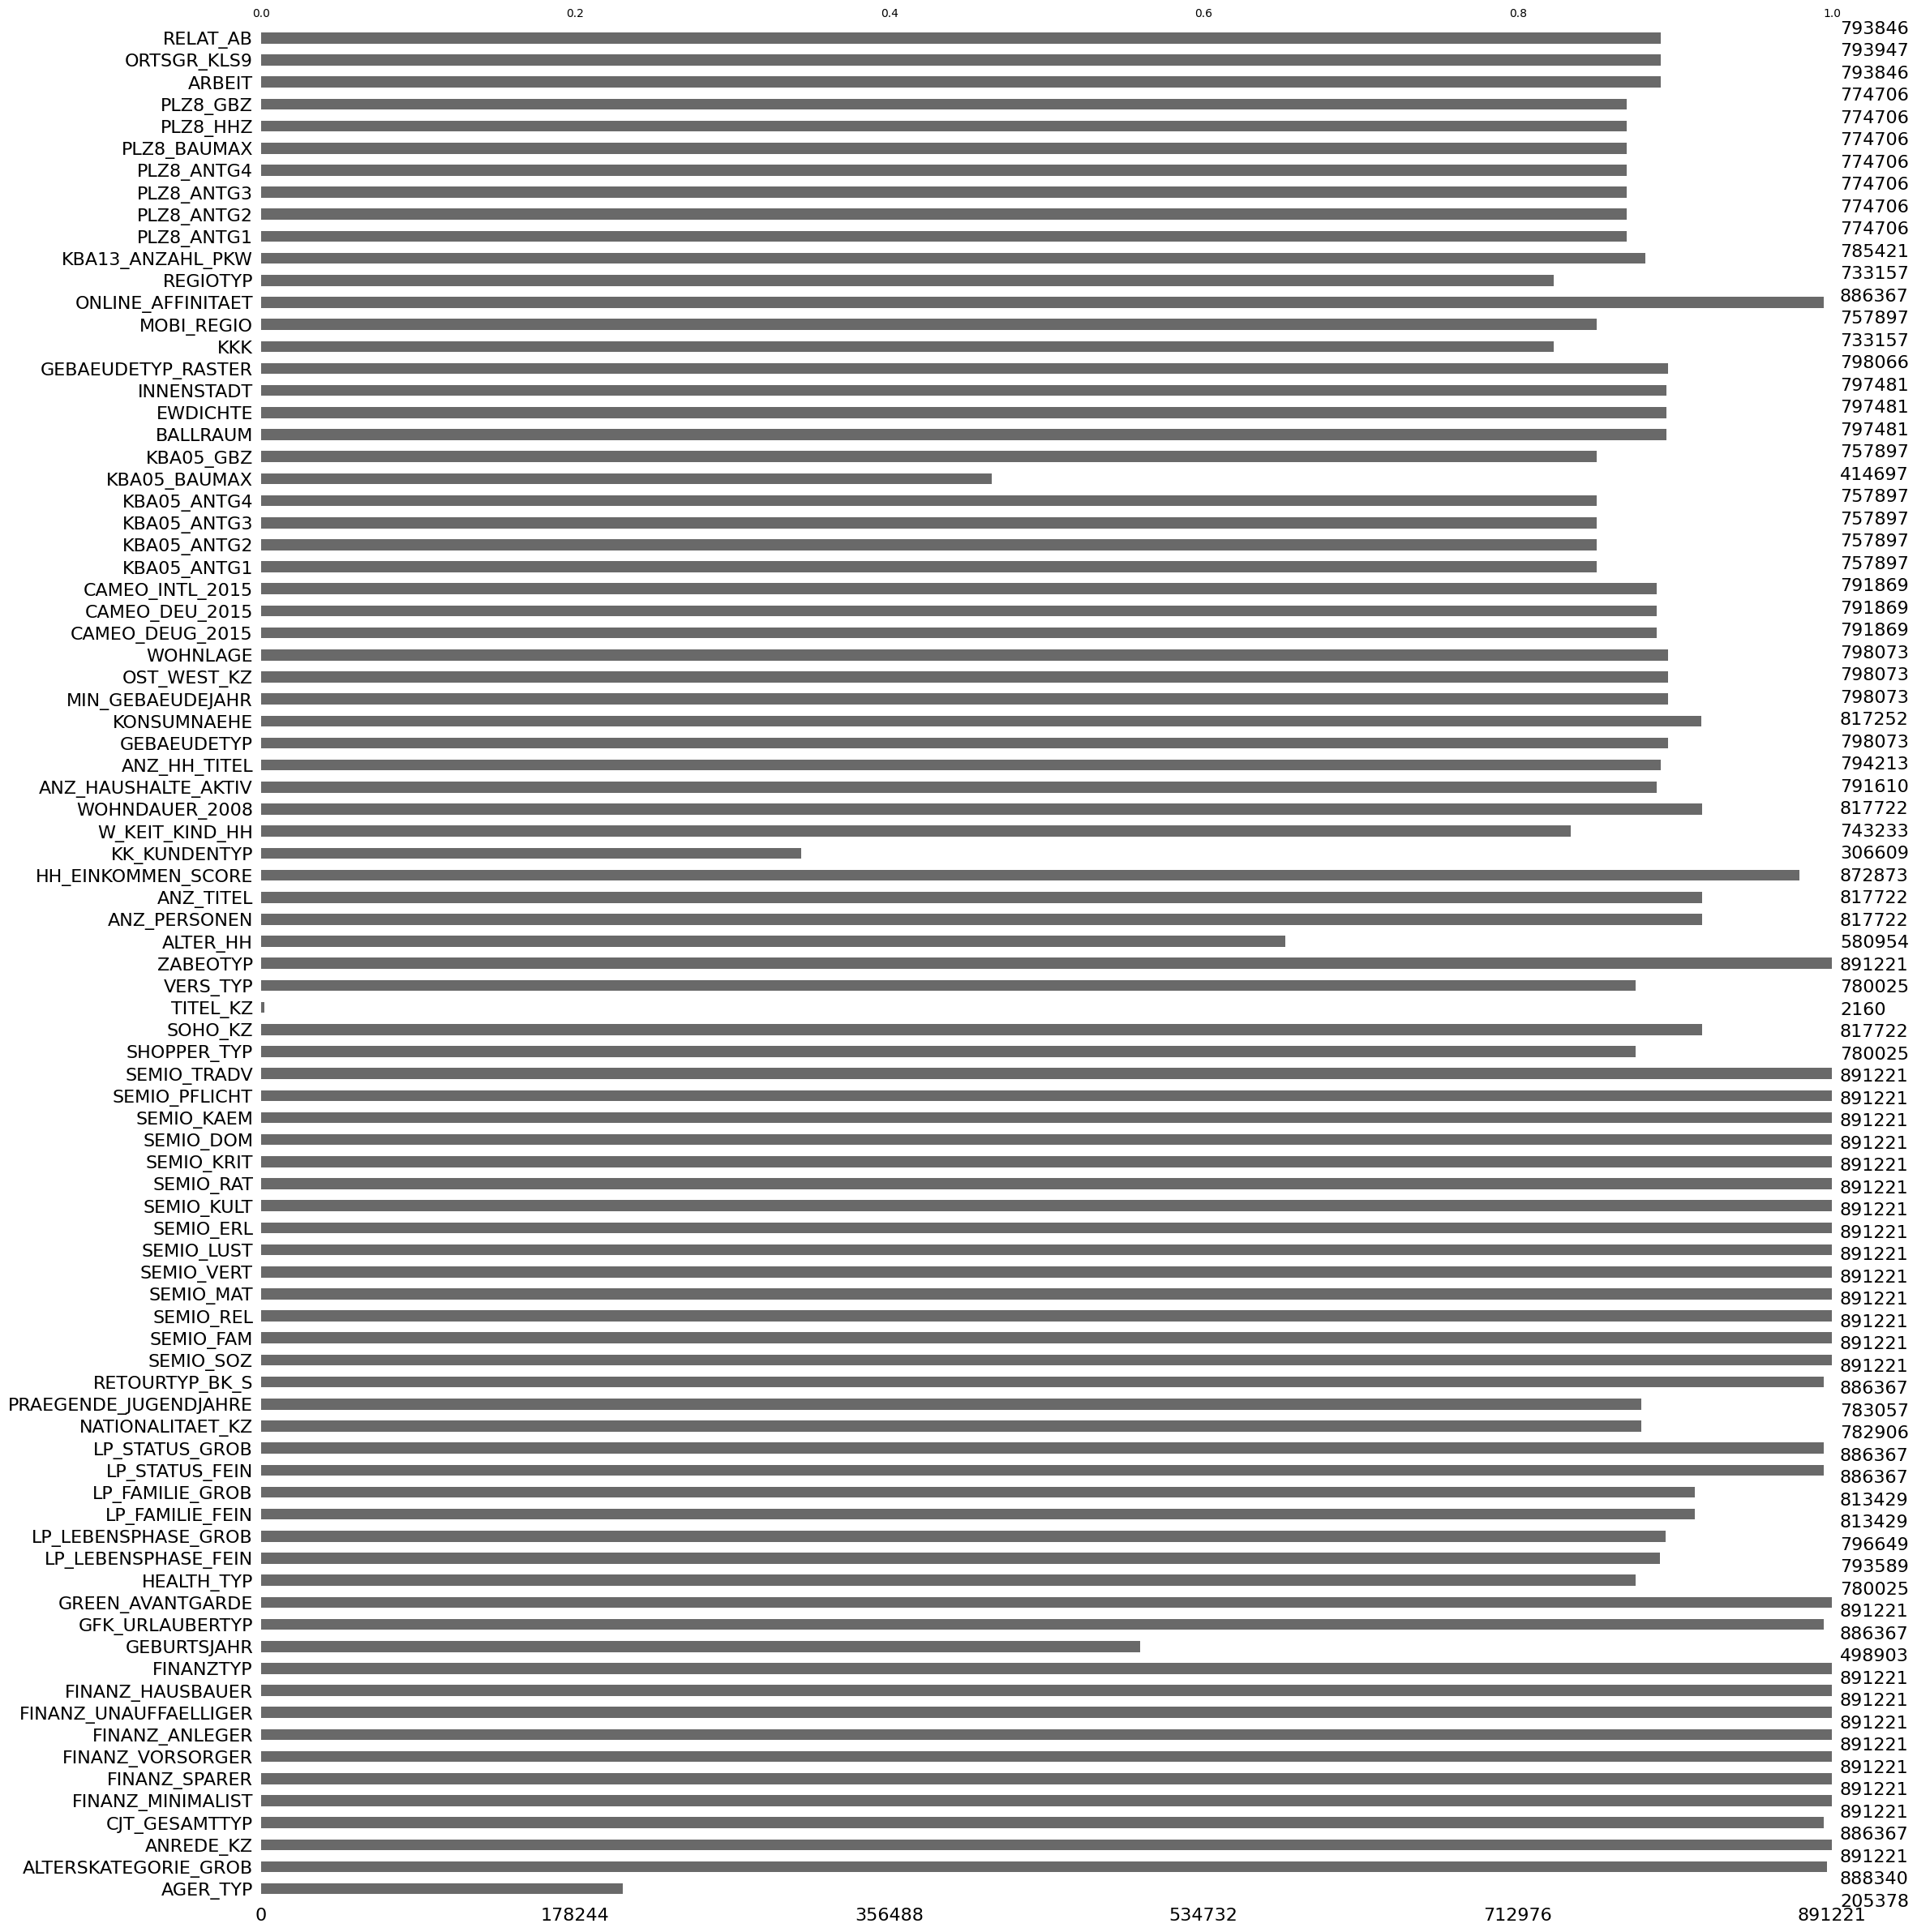

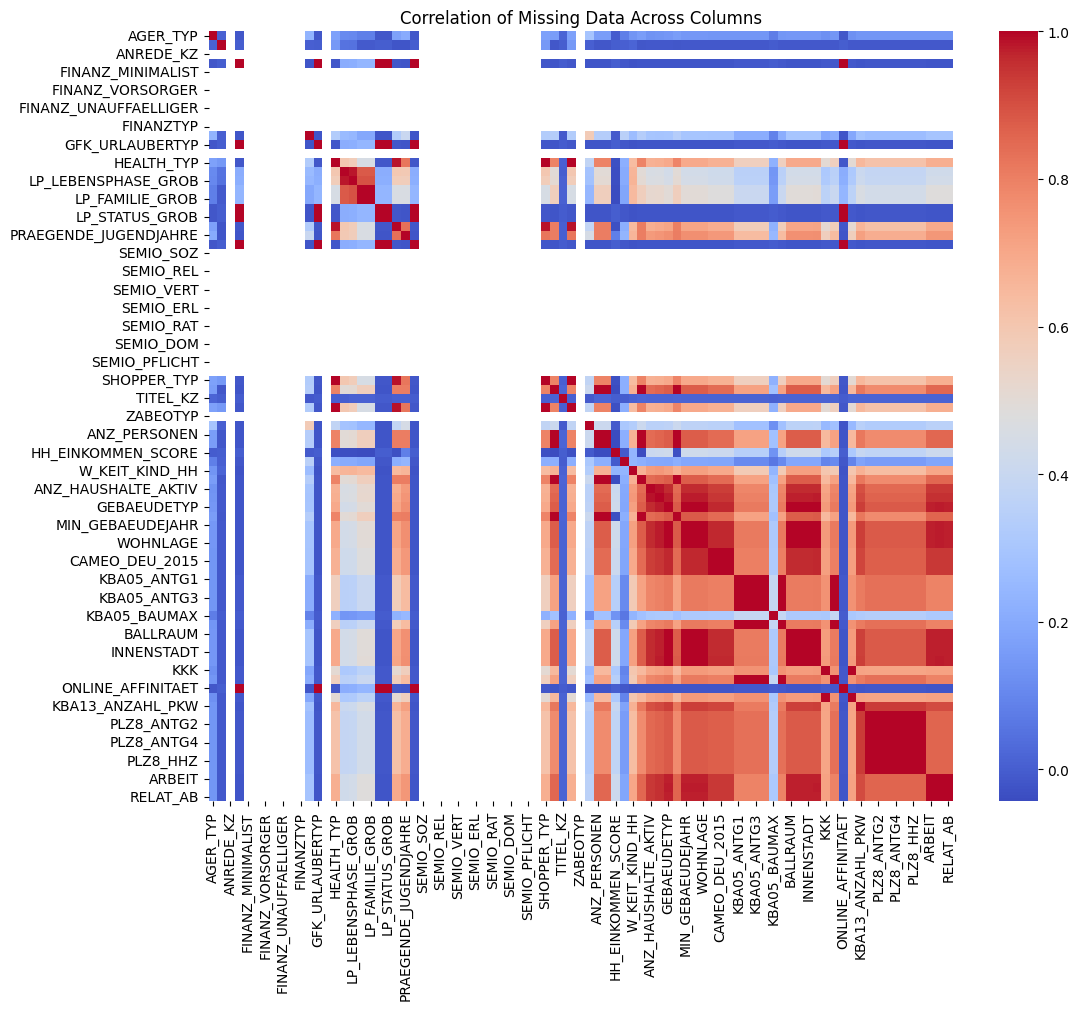

In [85]:
# Investigate patterns in the amount of missing data in each column.

# Plot histogram of missing proportions
plt.figure(figsize=(10, 6))
plt.hist(miss_proportion, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Missing Value Proportions")
plt.xlabel("Missing Value Proportion")
plt.ylabel("Number of Columns")
plt.show()

# Visualize missing data

plt.figure(figsize=(10,20))
msno.matrix(all_data2, sparkline=True)
plt.show()

plt.figure(figsize=(10,200))
msno.bar(all_data2)

# Correlation of missing data across columns
missing_corr = all_data2.isnull().corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(missing_corr, cmap="coolwarm", annot=False)
plt.title("Correlation of Missing Data Across Columns")
plt.show()


In [86]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# Define the threshold for missing data proportion
threshold = 0.70

# Identify columns with missing proportion greater than the threshold
columns_to_remove = missing_df[missing_df['Missing_Proportion'] > threshold]['attribute']

# Remove the identified columns from the dataset
all_data_cleaned = all_data2.drop(columns=columns_to_remove)

# Print information about removed columns
print(f"Removed {len(columns_to_remove)} columns with missing proportion greater than {threshold*100:.0f}%.\n")
print("Removed columns:")
print(columns_to_remove.tolist())



Removed 2 columns with missing proportion greater than 70%.

Removed columns:
['TITEL_KZ', 'AGER_TYP']


#### Discussion 1.1.2: Assess Missing Data in Each Column


1. Are there any patterns in missing values? 
2. Which columns were removed from the dataset?


<span style="color: blue;">**My Answer**</span>

1. **Total missing values for demographics = 4896838 = 0.06% of total values** 

                attribute  Missing_Proportion
40               TITEL_KZ              0.9972
0                AGER_TYP              0.7759
47           KK_KUNDENTYP              0.6596
64           KBA05_BAUMAX              0.5475

I do not know what patterns to see in the missing data, honestly.... 
I can see looking at the histogram of missing values distribtuion that the majority of columns are below 20% missing values so pretty good data I would say. 
In regards to correlations, I see some correlations between the missing values of one column to another but I see nothing usefull coming out of that observation. 


2. All columns with missing values more than 70% were removed completely from the dataset. 
The result is stored in the all_data_cleaned dataframe
You can see which columns were removed excactly above. 
They are unimportan columns in my opinion, I checked the descriptions.


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. 
If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. 
On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. 
We'll revisit these data later on. 
**Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

Missing values report for all cleaned demographics file: 

Type =  <class 'pandas.core.series.Series'> 

miss count rows =  0    0.566265
1    0.024096
2    0.024096
3    0.096386
4    0.012048
5    0.012048
6    0.036145
7    0.024096
8    0.024096
9    0.012048
dtype: float64 

        Row_Index  Missing_Proportion
732775     732775            0.626506
113316     113316            0.614458
389329     389329            0.614458
389332     389332            0.614458
73550       73550            0.614458


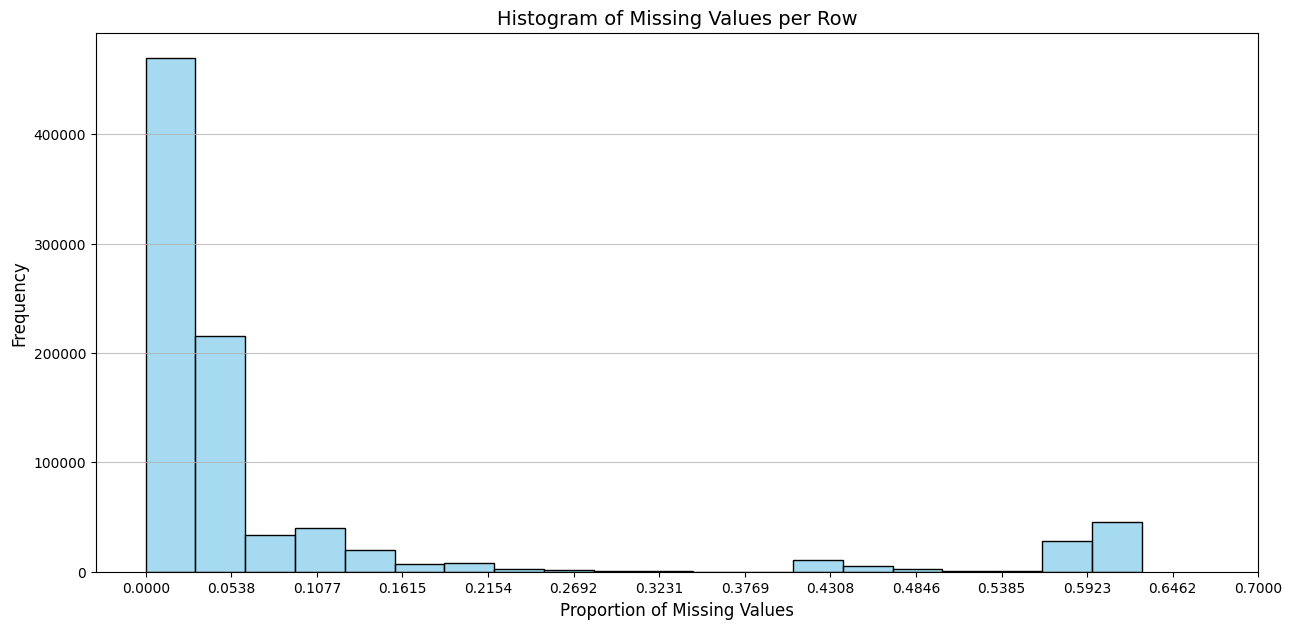

In [89]:
# How much data is missing in each row of the dataset?

print("Missing values report for all cleaned demographics file: \n")
miss_count_rows = all_data_cleaned.isnull().mean(axis=1)
print("Type = ", type(miss_count_rows), "\n")
print("miss count rows = ", miss_count_rows.head(10), "\n")


missing_rows_df = miss_count_rows.reset_index()
missing_rows_df.columns = ['Row_Index', 'Missing_Proportion']
missing_rows_df = missing_rows_df.sort_values(by='Missing_Proportion', ascending=False)

print(missing_rows_df.head())


# ploted a histogram here to check for optimal threshold
plt.figure(figsize=(15, 7))
sns.histplot(miss_count_rows, bins=20, kde=False, color='skyblue', edgecolor='black')

plt.title('Histogram of Missing Values per Row', fontsize=14)
plt.xlabel('Proportion of Missing Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
xticks = np.linspace(0, 0.7, 14) 
plt.xticks(xticks)
plt.show()


In [90]:
# Write code to divide the data into two subsets based on the number of missing values in each row.

# Define the threshold for missing data proportion for rows
threshold2 = 0.15


# Identify rows with missing proportion greater than the threshold
good_rows = pd.Series(miss_count_rows[miss_count_rows <= threshold2].index)
bad_rows = pd.Series(miss_count_rows[miss_count_rows > threshold2].index)


# Here I want to split the all_data_cleaned into 2 subsets based on row filtering
good_data = all_data_cleaned.loc[good_rows]
bad_data = all_data_cleaned.loc[bad_rows]

print('Good_Data shape = ', good_data.shape, "\n")
print('Bad_Data shape = ', bad_data.shape)


Good_Data shape =  (777909, 83) 

Bad_Data shape =  (113312, 83)


Distribution of Good Columns with low missing values 



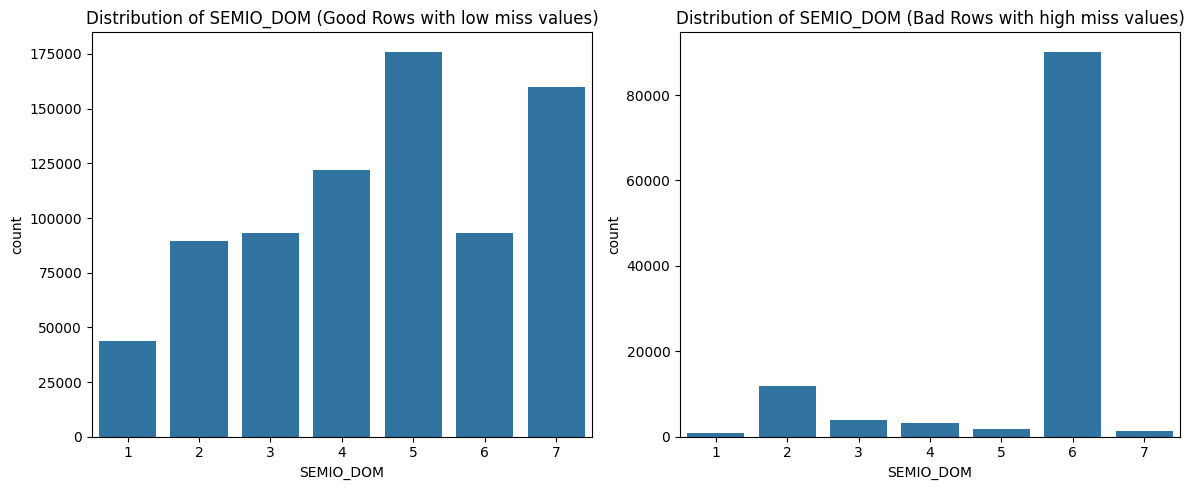

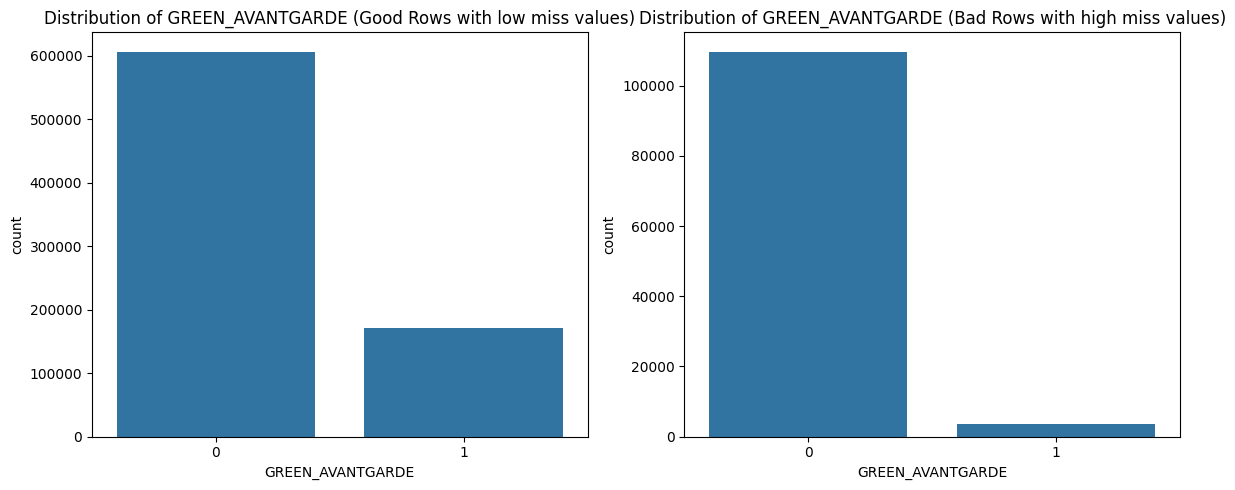

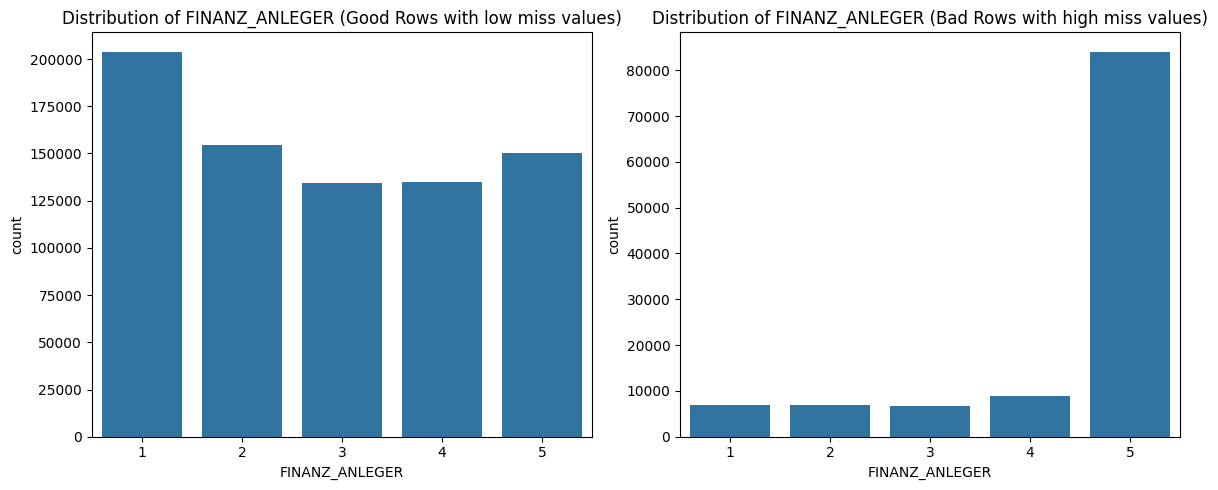

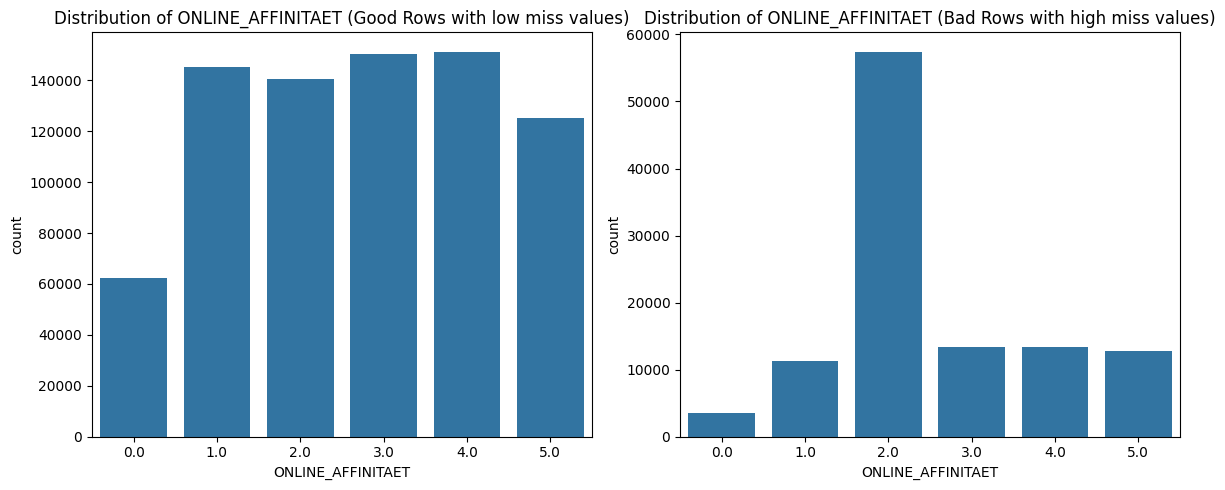

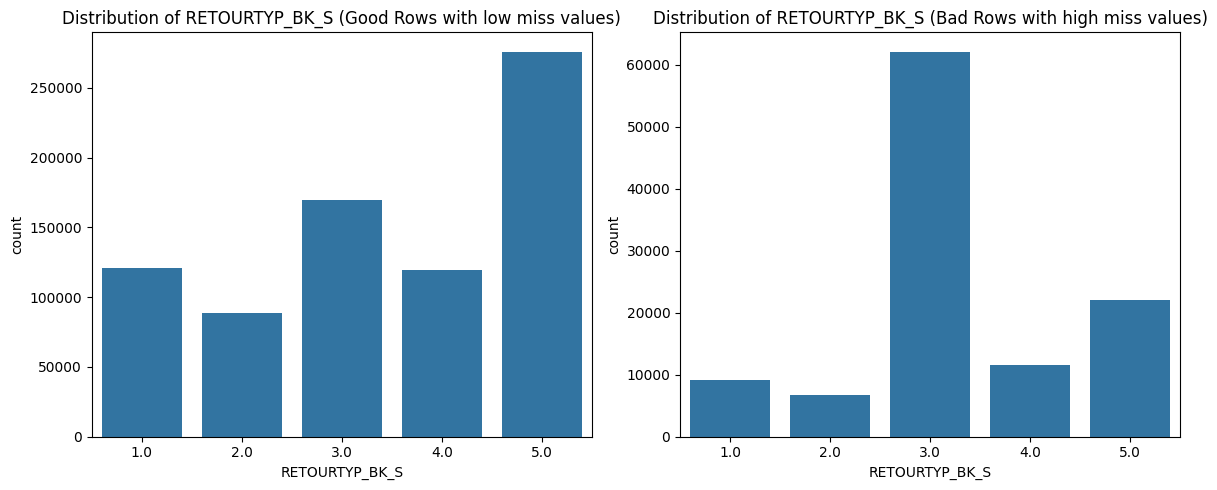

Distribution of Bad Columns with high missing values 



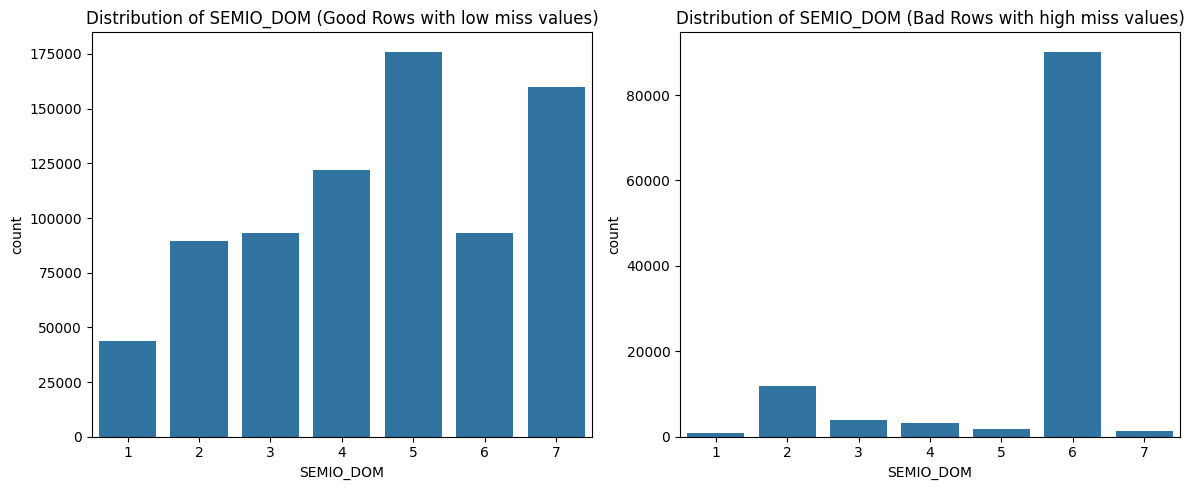

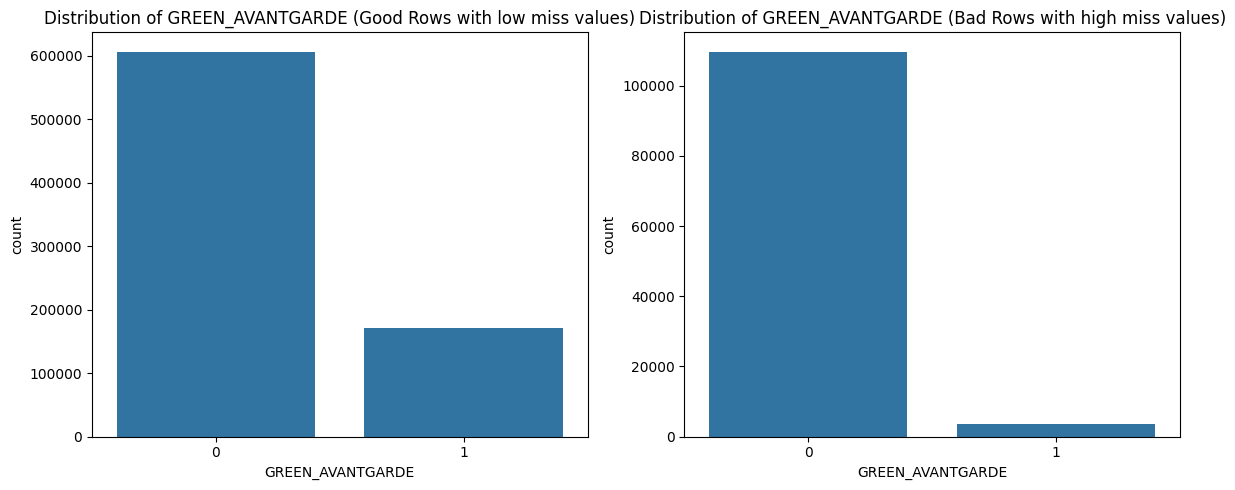

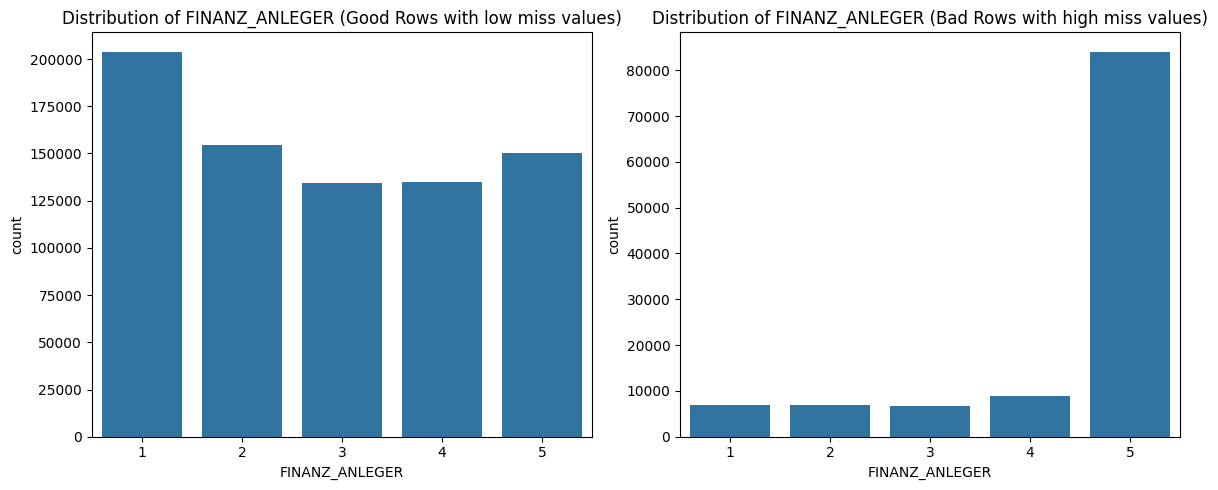

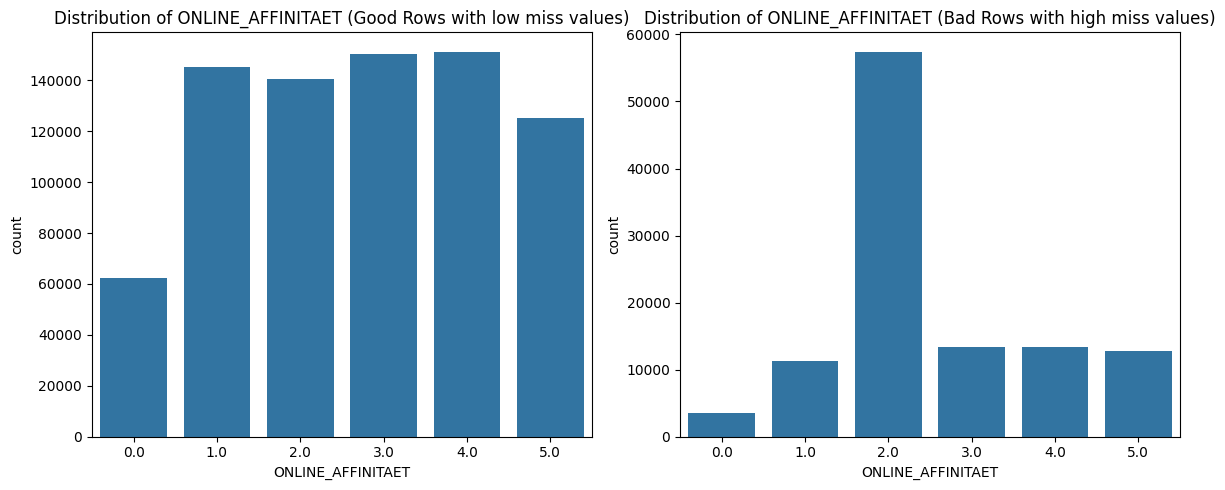

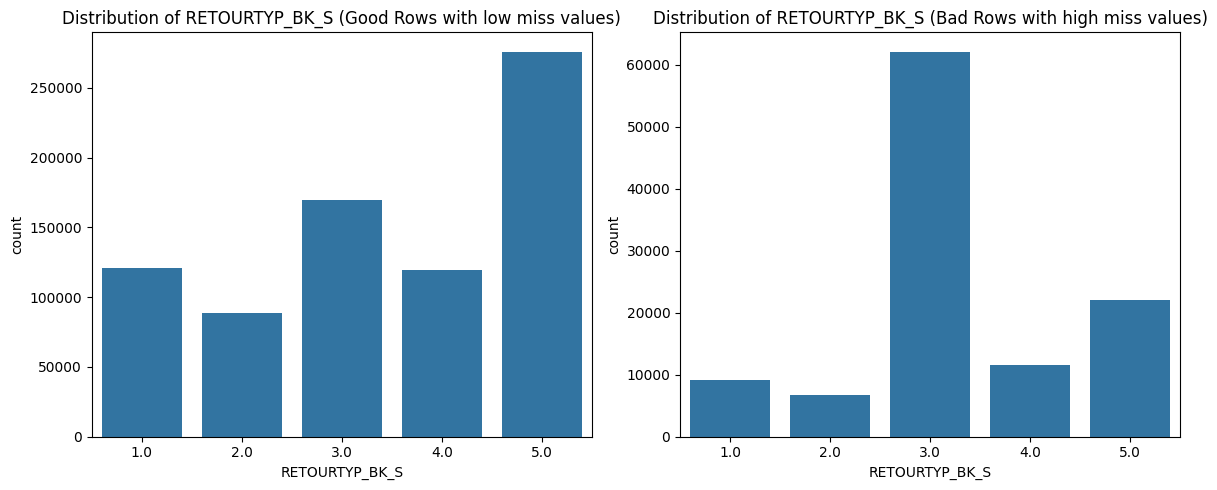

In [91]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

# I selected here 5 Good Columns with low missing values 
# and another 5 Bad Columns with High missing values
# just to see if the distribution of values is different
good_columns_to_compare = ['SEMIO_DOM', 'GREEN_AVANTGARDE', 'FINANZ_ANLEGER', 'ONLINE_AFFINITAET', 'RETOURTYP_BK_S']
bad_columns_to_compare = ['KK_KUNDENTYP', 'KBA05_BAUMAX', 'ALTER_HH', 'REGIOTYP', 'KKK']

def compare_columns(col):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(data=good_data, x=col)
    plt.title(f'Distribution of {col} (Good Rows with low miss values)')
    
    plt.subplot(1, 2, 2)
    sns.countplot(data=bad_data, x=col)
    plt.title(f'Distribution of {col} (Bad Rows with high miss values)')
    
    plt.tight_layout()
    plt.show()
    
    
print("Distribution of Good Columns with low missing values \n")
for (col) in good_columns_to_compare:
    compare_columns(col)
    
print("Distribution of Bad Columns with high missing values \n")
for (col) in good_columns_to_compare:
    compare_columns(col)

#### Discussion 1.1.3: Assess Missing Data in Each Row
 
Are the data with lots of missing values are qualitatively different from data with few or no missing values?


<span style="color: blue;">**My Answer**</span>

1. I did a histogram of all the rows missing values. 
Looking at it I selected 15% of being the optimum threshold which would separate the dataset in 2 subsets. 

2. I did a 2 histograms side by side to check the same column distribution in the good rows dataset vs the bad rows dataset 
As a bonus I selected here 5 Good Columns with low missing values  and another 5 Bad Columns with High missing values just to see if the distribution of values is different. 

<span style="color: blue;">**Conclusion**</span>

It seems there is a big difference between the distributions.<br> 
So if we remove the bad rows dataset my opinion is that we are losing important information. 



### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [94]:
# How many features are there of each data type?


print("OST_WEST_KZ values: ", good_data['OST_WEST_KZ'].unique())
print('CAMEO_DEUG_2015 values: ', good_data['CAMEO_DEUG_2015'].unique())
print('CAMEO_DEU_2015 values: ', good_data['CAMEO_DEU_2015'].unique())
print('CAMEO_INTL_2015 values: ', good_data['CAMEO_INTL_2015'].unique())
print('\n')

good_data.info()


OST_WEST_KZ values:  ['W' 'O']
CAMEO_DEUG_2015 values:  ['8' '4' '2' '6' '1' '9' '5' '7' '3' nan]
CAMEO_DEU_2015 values:  ['8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D'
 '9E' '9B' '1B' '3D' nan '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C'
 '9C' '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F'
 '5F' '1C']
CAMEO_INTL_2015 values:  ['51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' '25' nan
 '23' '31' '52' '35' '45' '44' '32']


<class 'pandas.core.frame.DataFrame'>
Index: 777909 entries, 1 to 891220
Data columns (total 83 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ALTERSKATEGORIE_GROB   775316 non-null  float64
 1   ANREDE_KZ              777909 non-null  int64  
 2   CJT_GESAMTTYP          774601 non-null  float64
 3   FINANZ_MINIMALIST      777909 non-null  int64  
 4   FINANZ_SPARER          777909 non-null  int64  
 5   FINANZ_VORSORGER       77790

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [96]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

good_data['OST_WEST_KZ'].replace({'W': 1, 'O': 2}, inplace = True)
print("OST_WEST_KZ values: ", good_data['OST_WEST_KZ'].unique())


for col in good_data.columns:
    if len(good_data[col].unique()) == 2 or len(good_data[col].unique()) == 3:
        print("Column :", col, "is binary")
       

C:\Users\Cristi\AppData\Local\Temp\ipykernel_17276\348089224.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  good_data['OST_WEST_KZ'].replace({'W': 1, 'O': 2}, inplace = True)
C:\Users\Cristi\AppData\Local\Temp\ipykernel_17276\348089224.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  good_da

OST_WEST_KZ values:  [1 2]
Column : ANREDE_KZ is binary
Column : GREEN_AVANTGARDE is binary
Column : SOHO_KZ is binary
Column : VERS_TYP is binary
Column : OST_WEST_KZ is binary


In [97]:
# Re-encode categorical variable(s) to be kept in the analysis.

# We remove one column from encoding because we will treat it manually later .
columns_for_encoding = ['CAMEO_DEUG_2015', 'CAMEO_DEU_2015']
all_data_one_hot = pd.get_dummies(good_data, columns = columns_for_encoding, drop_first=False)


print("DataFrame after One-Hot Encoding:")
print ('Shape: ', all_data_one_hot.shape)
print(all_data_one_hot.head(10))


DataFrame after One-Hot Encoding:
Shape:  (777909, 134)
    ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
1                    1.0          2            5.0                  1   
2                    3.0          2            3.0                  1   
3                    4.0          2            2.0                  4   
4                    3.0          1            5.0                  4   
5                    1.0          2            2.0                  3   
6                    2.0          2            5.0                  1   
7                    1.0          1            3.0                  3   
8                    3.0          1            3.0                  4   
9                    3.0          2            4.0                  2   
10                   3.0          2            1.0                  2   

    FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
1               5                 2               5           

#### Discussion 1.2.1: Re-Encode Categorical Features

(. Which ones did you keep, which did you drop, and what engineering steps did you perform?)


<span style="color: blue;">**My Answer**</span>
1. I checked for binary columns containing 2 or 3 unique values because NaN can be one value as well. 
I found one column OST_WEST_KZ which I encoded manually to 1 and 2
The rest of them are numeric and can remain unchanged.
I checked the data-dictionary_md to understand the columns. 

2. I searched for nominal categorical columns and I found 3: **CAMEO_DEUG_2015, CAMEO_DEU_2015, CAMEO_INTL_2015**
I encoded them using pd.get_dummies() with 0 and 1s 
I tried the onehotencoder library, but I droped it, since it was encoding all columns not just the 3 I wanted. 

3. The encoded data frame is now called all_data_one_hot
4. Then I came back and reomved **CAMEO_INTL_2015** because it was treated manually on a later step below


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [100]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.

print(all_data_one_hot['PRAEGENDE_JUGENDJAHRE'].unique())
print("\n")
all_data_one_hot['PRAEGENDE_JUGENDJAHRE'].dtype

# Step 1: Define the mapping dictionary
decade_mapping = {
    -1: 'unknown',
    0: 'unknown',
    1: '40s',
    2: '40s',
    3: '50s',
    4: '50s',
    5: '60s',
    6: '60s',
    7: '60s',
    8: '70s',
    9: '70s',
    10: '80s',
    11: '80s',
    12: '80s',
    13: '80s',
    14: '90s',
    15: '90s'
}

all_data_one_hot['PJ_Decade'] = all_data_one_hot['PRAEGENDE_JUGENDJAHRE'].map(decade_mapping)

print(all_data_one_hot[['PJ_Decade','PRAEGENDE_JUGENDJAHRE']].head(10))

# Step 2: Define the mapping dictionary
generation_mapping = {
    -1: 'unknown',
    0: 'unknown',
    1: 'war years',
    2: 'reconstruction years',
    3: 'economic miracle',
    4: 'milk bar / Individualisation',
    5: 'economic miracle (',
    6: 'generation 68 / student protestors',
    7: 'opponents to the building of the Wall',
    8: 'family orientation',
    9: 'peace movement',
    10: 'Generation Golf',
    11: 'ecological awareness',
    12: 'FDJ / communist party youth organisation',
    13: 'Swords into ploughshares',
    14: 'digital media kids',
    15: 'ecological awareness'
}

all_data_one_hot['PJ_Generation'] = all_data_one_hot['PRAEGENDE_JUGENDJAHRE'].map(generation_mapping)
print(all_data_one_hot[['PJ_Decade','PRAEGENDE_JUGENDJAHRE', 'PJ_Generation']].head(10))


[14. 15.  8.  3. 10. 11.  5.  9.  6.  4. nan  2.  1. 12. 13.  7.]


   PJ_Decade  PRAEGENDE_JUGENDJAHRE
1        90s                   14.0
2        90s                   15.0
3        70s                    8.0
4        70s                    8.0
5        50s                    3.0
6        80s                   10.0
7        70s                    8.0
8        80s                   11.0
9        90s                   15.0
10       50s                    3.0
   PJ_Decade  PRAEGENDE_JUGENDJAHRE         PJ_Generation
1        90s                   14.0    digital media kids
2        90s                   15.0  ecological awareness
3        70s                    8.0    family orientation
4        70s                    8.0    family orientation
5        50s                    3.0      economic miracle
6        80s                   10.0       Generation Golf
7        70s                    8.0    family orientation
8        80s                   11.0  ecological awareness
9        90s  

In [101]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

print(all_data_one_hot['CAMEO_INTL_2015'].unique())
print("\n")

all_data_one_hot['CI_Wealth'] = all_data_one_hot['CAMEO_INTL_2015'].str[0].astype(float)  # First digit
all_data_one_hot['CI_Life_stage'] = all_data_one_hot['CAMEO_INTL_2015'].str[1].astype(float)  # Second digit

    
print (all_data_one_hot[['CAMEO_INTL_2015','CI_Wealth', 'CI_Life_stage']].head(15))

['51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' '25' nan
 '23' '31' '52' '35' '45' '44' '32']


   CAMEO_INTL_2015  CI_Wealth  CI_Life_stage
1               51        5.0            1.0
2               24        2.0            4.0
3               12        1.0            2.0
4               43        4.0            3.0
5               54        5.0            4.0
6               22        2.0            2.0
7               14        1.0            4.0
8               13        1.0            3.0
9               15        1.0            5.0
10              51        5.0            1.0
12              43        4.0            3.0
13              33        3.0            3.0
15              41        4.0            1.0
16              41        4.0            1.0
18              24        2.0            4.0


#### Discussion 1.2.2: Engineer Mixed-Type Features

Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. 
**Which ones did you keep, which did you drop, and what engineering steps did you perform?**

<span style="color: blue;">**My Answer**</span>

1. On "PRAEGENDE_JUGENDJAHRE" I made 2 new columns containing decade and generation 
2. On "CAMEO_INTL_2015" I made 2 new columns with Wealth and Stage of Life. I kept the values as float
3. Now I need to re-encode ['PJ_Decade','PRAEGENDE_JUGENDJAHRE', 'PJ_Generation']
No need to re-e-ncode ['CAMEO_INTL_2015','CI_Wealth', 'CI_Life_stage since the numbers make sense here. 

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [104]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)


all_data_3 = all_data_one_hot.drop(columns=['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015'])
print ('Shape of all_data_3 before encoding: ', all_data_3)
columns_for_encoding2 = ['PJ_Decade', 'PJ_Generation']
all_data_3 = pd.get_dummies(all_data_3, columns = columns_for_encoding2, drop_first=False)
print ('Shape of all_data_3 after encoding: ', all_data_3)


Shape of all_data_3 before encoding:          ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
1                        1.0          2            5.0                  1   
2                        3.0          2            3.0                  1   
3                        4.0          2            2.0                  4   
4                        3.0          1            5.0                  4   
5                        1.0          2            2.0                  3   
...                      ...        ...            ...                ...   
891216                   3.0          2            5.0                  1   
891217                   2.0          1            4.0                  3   
891218                   2.0          2            4.0                  2   
891219                   1.0          1            3.0                  1   
891220                   4.0          1            1.0                  4   

        FINANZ_SPARER  FINANZ_VORSORG

In [105]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [107]:
customer_data = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ";")


In [108]:
display(customer_data.shape)
display(customer_data.head())


(191652, 85)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [109]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    df.replace(feature_dict, np.nan, inplace = True)
    
    # remove selected columns, ...
    df.drop(columns=columns_to_remove, inplace = True, errors='ignore')
    
    print(f"Removed {len(columns_to_remove)} columns with missing proportion greater than {threshold*100:.0f}%.\n")
    print("Removed columns:")
    print(columns_to_remove.tolist())
    
    # remove selected rows, ...
    threshold2 = 0.15
    miss_count_rows = df.isnull().mean(axis=1)
    good_rows = pd.Series(miss_count_rows[miss_count_rows <= threshold2].index)
    bad_rows = pd.Series(miss_count_rows[miss_count_rows > threshold2].index)
    good_data = df.loc[good_rows] #.reset_index(drop = True)
    bad_data = df.loc[bad_rows]

    print('Good_Data shape = ', good_data.shape, "\n")
    print('Bad_Data shape = ', bad_data.shape)
    
    
    # select, re-encode, and engineer column values.
    good_data['OST_WEST_KZ'].replace({'W': 1, 'O': 2}, inplace = True)
    print("OST_WEST_KZ values: ", good_data['OST_WEST_KZ'].unique())
    good_data['PJ_Decade'] = good_data['PRAEGENDE_JUGENDJAHRE'].map(decade_mapping)
    good_data['PJ_Generation'] = good_data['PRAEGENDE_JUGENDJAHRE'].map(generation_mapping)
    good_data['CI_Wealth'] = good_data['CAMEO_INTL_2015'].str[0].astype(float)  # First digit
    good_data['CI_Life_stage'] = good_data['CAMEO_INTL_2015'].str[1].astype(float)  # Second digit
    
    columns_for_encoding = ['CAMEO_DEUG_2015', 'CAMEO_DEU_2015', 'PJ_Decade', 'PJ_Generation']
    customer_clean_data = pd.get_dummies(good_data, columns = columns_for_encoding, drop_first=False)
    
    customer_clean_data.drop(columns=['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015'], inplace = True)

    
    # Return the cleaned dataframe.
    return customer_clean_data

     
customer_clean_data = clean_data(customer_data)
print("Clean Data shape after function: ",customer_clean_data.shape)


Removed 2 columns with missing proportion greater than 70%.

Removed columns:
['TITEL_KZ', 'AGER_TYP']
Good_Data shape =  (138523, 83) 

Bad_Data shape =  (53129, 83)
OST_WEST_KZ values:  [1 2]


C:\Users\Cristi\AppData\Local\Temp\ipykernel_17276\3287232146.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  good_data['OST_WEST_KZ'].replace({'W': 1, 'O': 2}, inplace = True)
C:\Users\Cristi\AppData\Local\Temp\ipykernel_17276\3287232146.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  goo

Clean Data shape after function:  (138523, 154)


## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [111]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', copy = False) 
all_data_4 = pd.DataFrame(imputer.fit_transform(all_data_3), columns=all_data_3.columns)

print("all_data_4 shape: ", all_data_4.shape)
print(all_data_4.head())

all_data_4 shape:  (777909, 154)
   ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0                   1.0        2.0            5.0                1.0   
1                   3.0        2.0            3.0                1.0   
2                   4.0        2.0            2.0                4.0   
3                   3.0        1.0            5.0                4.0   
4                   1.0        2.0            2.0                3.0   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0            5.0               2.0             5.0                    4.0   
1            4.0               1.0             2.0                    3.0   
2            2.0               5.0             2.0                    1.0   
3            3.0               4.0             1.0                    3.0   
4            1.0               5.0             2.0                    2.0   

   FINANZ_HAUSBAUER  FINANZTYP  ...  PJ_Generation_ecological awareness

In [112]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_list = scaler.fit_transform(all_data_4)
scaled_data = pd.DataFrame(scaled_list, columns=all_data_4.columns)

print("all_data_4 shape: ", all_data_4.shape)
print("scaled_data_4 shape:" , scaled_data.shape)

#print(scaled_data.head())

all_data_4 shape:  (777909, 154)
scaled_data_4 shape: (777909, 154)


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

<span style="color: blue;">**My Answer**</span>

I did not want to drop any more columns or lines. <br>
I made the threshold decisions and removed already anything necessary. <br>
That is why I think imputation is the best mettod to replace NaNs. <br>
I chose the most frequent value to be placed in all NaNs. <br>
In my opinion this corrupts data the least because it does not generate any value which is not already present. 



### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [115]:
# Apply PCA to the data.

from sklearn.decomposition import PCA

pca = PCA()  # Initialize PCA without parameters
pca.fit(scaled_data)

PCA()

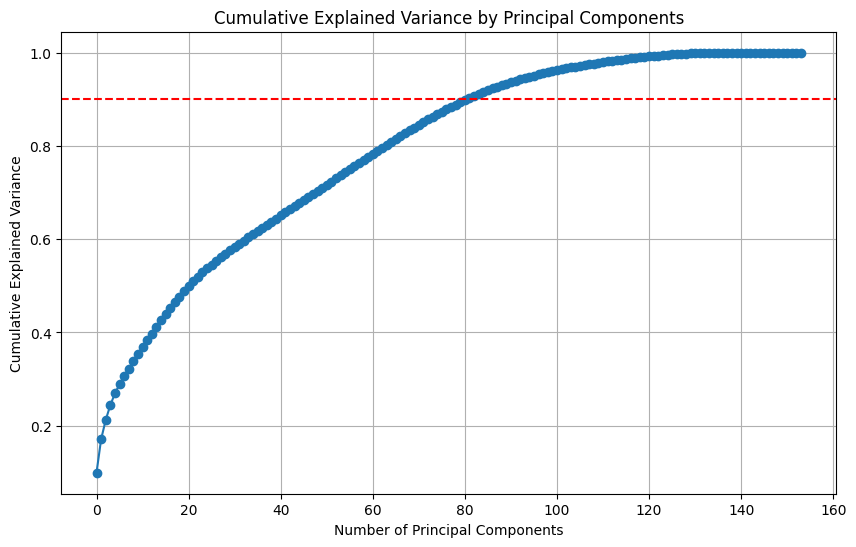

In [116]:
# Investigate the variance accounted for by each principal component.

# Step 2: Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


# Step 3: Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.90, color='r', linestyle='--')  # Example threshold line at 90%
plt.show()


In [117]:
# Re-apply PCA to the data while selecting for number of components to retain.

# Step 4: Select number of components to keep
# For example, if you decide to keep components that explain at least 90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1  # +1 because of zero indexing
print(f"Number of components to retain: {n_components}")

# Step 5: Refit PCA with the selected number of components
pca_final = PCA(n_components=n_components)
scaled_data_reduced = pca_final.fit_transform(scaled_data)

columns = [f'Princip_Comp {val +1}' for val in range (n_components)]
final_data = pd.DataFrame(scaled_data_reduced, columns=columns)

# Display the transformed data
print("Transformed data shape:", scaled_data_reduced.shape, "Type :", type(scaled_data_reduced))
print("\n")
print("Transformed data:\n", scaled_data_reduced)
print("\n")
print("Final dataframe (final_data): \n", final_data.head())


Number of components to retain: 82
Transformed data shape: (777909, 82) Type : <class 'numpy.ndarray'>


Transformed data:
 [[-4.82655577 -3.85622188  2.825335   ...  0.1081526  -1.20241822
  -1.35788558]
 [ 0.37512391 -0.87375036  3.61601851 ... -1.01022612 -0.84752665
   0.42156618]
 [ 4.45299148  2.01233182  0.75714302 ... -0.42465021 -0.49834229
  -0.38042071]
 ...
 [ 0.36495569 -3.91708777  2.83127896 ... -0.34699508  0.70657039
   0.27876565]
 [-6.01161982 -4.38987854 -2.9004895  ... -0.7351623   0.42545673
  -0.29293924]
 [-0.01956811  2.27015856 -2.7141808  ... -0.8833717  -0.99535461
  -0.32712776]]


Final dataframe (final_data): 
    Princip_Comp 1  Princip_Comp 2  Princip_Comp 3  Princip_Comp 4  \
0       -4.826556       -3.856222        2.825335        0.536135   
1        0.375124       -0.873750        3.616019       -0.818889   
2        4.452991        2.012332        0.757143       -2.440777   
3        0.403274        0.124109       -2.879216        3.423339   
4    

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. 
How many principal components / transformed features are you retaining for the next step of the analysis?)

<span style="color: blue;">**My Answer**</span>

I retained 82 components out of 155 coresponding to 90% of explained variance. <br> 
So roughly 50% of the components. 



### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [120]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

# Step 3: Create a function to print sorted feature weights
def print_feature_weights(pca, component_index):
    weights = pca.components_[component_index]
    feature_names = scaled_data.columns
    feature_weights = pd.DataFrame(weights, index=feature_names, columns=['Weight'])
    sorted_weights = feature_weights.sort_values(by='Weight', ascending=False)
    print(f"Principal Component {component_index + 1} Feature Weights:")
    print(sorted_weights)
    print("\n")

print_feature_weights(pca_final, 0)


Principal Component 1 Feature Weights:
                      Weight
LP_STATUS_FEIN      0.202823
LP_STATUS_GROB      0.201907
MOBI_REGIO          0.193675
FINANZ_MINIMALIST   0.189106
PLZ8_ANTG1          0.186248
...                      ...
PLZ8_BAUMAX        -0.176144
PLZ8_ANTG4         -0.179219
HH_EINKOMMEN_SCORE -0.182009
CI_Wealth          -0.183876
PLZ8_ANTG3         -0.184987

[154 rows x 1 columns]




In [121]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print_feature_weights(pca_final, 1)

Principal Component 2 Feature Weights:
                         Weight
ALTERSKATEGORIE_GROB   0.232939
FINANZ_VORSORGER       0.222454
SEMIO_ERL              0.179211
SEMIO_LUST             0.162440
RETOURTYP_BK_S         0.159311
...                         ...
SEMIO_PFLICHT         -0.203955
PJ_Decade_90s         -0.208877
SEMIO_REL             -0.210866
FINANZ_UNAUFFAELLIGER -0.219164
FINANZ_SPARER         -0.229606

[154 rows x 1 columns]




In [122]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

print_feature_weights(pca_final, 2)

Principal Component 3 Feature Weights:
                     Weight
ANREDE_KZ          0.366284
SEMIO_KAEM         0.339026
SEMIO_DOM          0.308830
SEMIO_KRIT         0.281387
SEMIO_ERL          0.215264
...                     ...
FINANZ_MINIMALIST -0.136061
SEMIO_KULT        -0.268440
SEMIO_SOZ         -0.269534
SEMIO_FAM         -0.276801
SEMIO_VERT        -0.338237

[154 rows x 1 columns]




### Discussion 2.3: Interpret Principal Components


Can we interpret positive and negative values from them in a meaningful way?)

<span style="color: blue;">**My Answer**</span>

**Principal Component 1:**
Top 3 pozitive features: 
                                                      Weight
FINANZ_HAUSBAUER                                    0.194440
PLZ8_BAUMAX                                         0.177768
HH_EINKOMMEN_SCORE                                  0.176405

Top 3 negative features: 
FINANZ_MINIMALIST                                  -0.197853
LP_STATUS_FEIN                                     -0.204278
MOBI_REGIO                                         -0.211694

**Interpretation: PC1** is correlated with Home ownership - very low, lives in PLZ8 region, income - very low and inverse correlated with: low financial interest , social status - low income , movement patterns - very high   
  **So I would say PC1 high means a low income, not a home owner, high movement person**


**Principal Component 2:**
Top 3 pozitive features: 
                                                      Weight
FINANZ_SPARER                                       0.282250
GEBURTSJAHR                                         0.266851
FINANZ_ANLEGER                                      0.247457

Top 3 negative features: 
SEMIO_LUST                                         -0.188442
ALTERSKATEGORIE_GROB                               -0.231467
FINANZ_VORSORGER                                   -0.277025


**Interpretation: High score in PC2 means the person is a Money saver, young person, investor, very sensual-minded, probably under 30-40 years, financially prepared**. So I would say a young investor.



**Principal Component 3:**
Top 3 pozitive features: 
                                                      Weight
SEMIO_KULT                                          0.282150
SEMIO_VERT                                          0.270438
SEMIO_FAM                                           0.255784

Top 3 negative features: 
SEMIO_ERL                                          -0.264816
SEMIO_KAEM                                         -0.287723
ANREDE_KZ                                          -0.301370


**Interpretation: High score in PC3 means the person is low cultural, less dreamful, less familiy oriented, event oriented, combative atitude, and a male. So we are talking about a practical, no culture fighter male.**




## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [125]:
# Over a number of different cluster counts...
from sklearn.cluster import KMeans

# i am testing on less cluster numbers since it takes a very long time
# but i tested on 30 clusters and observed 28 as the best fit.
inertia = []  # To store the inertia values
cluster_counts = range(2, 11)  # Testing cluster counts from 2 to 30


    # run k-means clustering on the data and...
for n_clusters in cluster_counts:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data_reduced)
    inertia.append(kmeans.inertia_)  # Store the inertia value    
    print("I finished Cluster =", n_clusters, "...\n")
    

I finished Cluster = 2 ...

I finished Cluster = 3 ...

I finished Cluster = 4 ...

I finished Cluster = 5 ...

I finished Cluster = 6 ...

I finished Cluster = 7 ...

I finished Cluster = 8 ...

I finished Cluster = 9 ...

I finished Cluster = 10 ...



In [126]:
   # compute the average within-cluster distances.

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
average_distances = []

for i in range(kmeans.n_clusters):
    # Get points in the current cluster
    cluster_points = scaled_data_reduced[labels == i]
    # Calculate distances from the centroid
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
    # Compute the average distance for the current cluster
    average_distance = np.mean(distances)
    average_distances.append(average_distance)

    
# Display the average within-cluster distances
for i, avg_dist in enumerate(average_distances):
    print(f"Average distance for cluster {i}: {avg_dist:.4f}")
    
    
    # Display the cluster centers
print("Cluster centers:")
print(kmeans.cluster_centers_)
    

Average distance for cluster 0: 8.3123
Average distance for cluster 1: 8.9073
Average distance for cluster 2: 9.5670
Average distance for cluster 3: 10.0804
Average distance for cluster 4: 11.0009
Average distance for cluster 5: 9.6902
Average distance for cluster 6: 10.8177
Average distance for cluster 7: 9.8735
Average distance for cluster 8: 10.3932
Average distance for cluster 9: 11.2421
Cluster centers:
[[ 3.47894662e+00 -1.87249091e+00  3.71804605e-01  1.34698162e-01
  -2.61658567e-01  7.03792999e-01  8.65191582e-01 -4.68603525e-01
  -5.98300572e-01 -1.35509549e+00  1.41386571e+00 -5.41944222e-01
   7.40610055e-01 -1.38988881e+00  2.57509507e+00 -4.38270568e-02
   1.34375901e+00 -5.28070907e-01 -1.65286374e+00  3.37789810e-01
   3.31010553e-01 -1.71944348e+00  2.32621072e+00 -9.46694739e-01
  -2.33044791e+00  8.10449626e-01  2.74173390e+00 -4.48440106e-01
  -1.30988831e+00 -6.04045779e-01 -1.96678057e+00  1.20809001e+00
  -7.65885247e-01 -1.34510059e-02 -2.20126593e-01  1.1330004

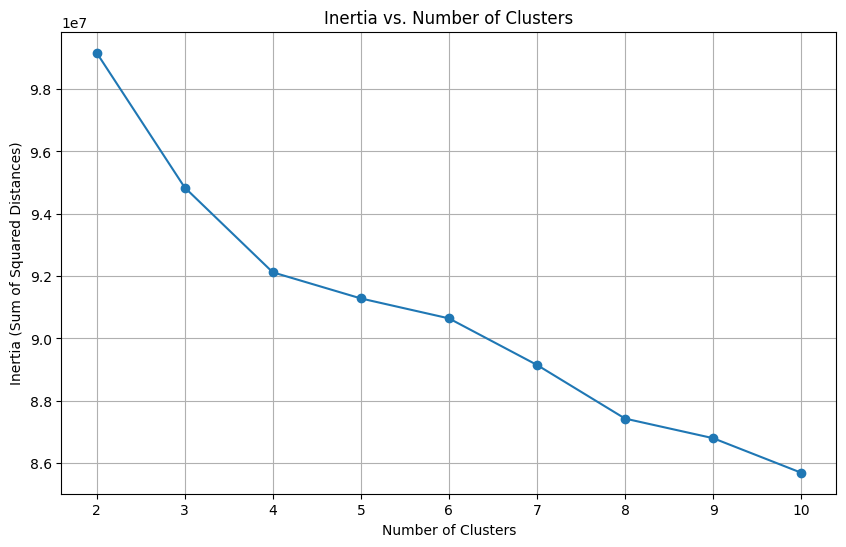

In [127]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.figure(figsize=(10, 6))
plt.plot(cluster_counts, inertia, marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_counts)
plt.grid()
plt.show()


In [128]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

# I got this number with the elbow method on 30 clusters which took a huge amount of time....
optimal_clusters = 28

final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_kmeans.fit(scaled_data_reduced)

final_data['Cluster'] = final_kmeans.labels_
original_pop_data_with_clusters = all_data_4
original_pop_data_with_clusters['Cluster'] = final_kmeans.labels_ 

# Display the DataFrame with cluster assignments
print(final_data.head())

   Princip_Comp 1  Princip_Comp 2  Princip_Comp 3  Princip_Comp 4  \
0       -4.826556       -3.856222        2.825335        0.536135   
1        0.375124       -0.873750        3.616019       -0.818889   
2        4.452991        2.012332        0.757143       -2.440777   
3        0.403274        0.124109       -2.879216        3.423339   
4        0.303587        0.241148        0.386541       -4.063606   

   Princip_Comp 5  Princip_Comp 6  Princip_Comp 7  Princip_Comp 8  \
0       -0.844113       -1.630499       -2.077002        0.003691   
1        3.105433       -0.550969       -1.048451        0.349835   
2        0.616919        2.826983       -0.767724       -2.484463   
3       -2.927090        1.068408       -2.073650        2.716670   
4       -0.144470       -1.613547        0.466453        2.551468   

   Princip_Comp 9  Princip_Comp 10  ...  Princip_Comp 74  Princip_Comp 75  \
0       -1.155176        -1.467596  ...        -0.335555        -0.302333   
1        0.15605

In [129]:

original_pop_data_with_clusters = all_data_4
original_pop_data_with_clusters['Cluster'] = final_kmeans.labels_ 
print(original_pop_data_with_clusters.shape)
print(original_pop_data_with_clusters.head())


(777909, 155)
   ALTERSKATEGORIE_GROB  ANREDE_KZ  CJT_GESAMTTYP  FINANZ_MINIMALIST  \
0                   1.0        2.0            5.0                1.0   
1                   3.0        2.0            3.0                1.0   
2                   4.0        2.0            2.0                4.0   
3                   3.0        1.0            5.0                4.0   
4                   1.0        2.0            2.0                3.0   

   FINANZ_SPARER  FINANZ_VORSORGER  FINANZ_ANLEGER  FINANZ_UNAUFFAELLIGER  \
0            5.0               2.0             5.0                    4.0   
1            4.0               1.0             2.0                    3.0   
2            2.0               5.0             2.0                    1.0   
3            3.0               4.0             1.0                    3.0   
4            1.0               5.0             2.0                    2.0   

   FINANZ_HAUSBAUER  FINANZTYP  ...  PJ_Generation_economic miracle  \
0               5.0

### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)


<span style="color: blue;">**My Answer:**</span>

After doing the elbow method we can see that the minimum optimal inertia (the sum of squares from all the points to the cluster centers) is 28. 
So optimum cluste numner = 28

I think if we go higher than 30 we might get a better cluster number.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [134]:
# Load in the customer demographics data.

customer_data = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep = ";")

display(customer_data.shape)
display(customer_data.head())

(191652, 85)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [155]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customer_clean_data = clean_data(customer_data)


#imputer = SimpleImputer(strategy='most_frequent', copy = False) 
customer_clean_data_2 = imputer.transform(customer_clean_data)
scaled_customer_list = scaler.transform(customer_clean_data_2)
pca_customer_data = pca_final.transform(scaled_customer_list)
cluster_assignments = final_kmeans.predict(pca_customer_data)

customer_clean_data['Cluster'] = cluster_assignments

#print("Customer Data with Cluster Assignments:")
#print(customer_clean_data_2.head())


Removed 2 columns with missing proportion greater than 70%.

Removed columns:
['TITEL_KZ', 'AGER_TYP']
Good_Data shape =  (138523, 83) 

Bad_Data shape =  (53129, 83)
OST_WEST_KZ values:  [1 2]


C:\Users\Cristi\AppData\Local\Temp\ipykernel_17276\3287232146.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  good_data['OST_WEST_KZ'].replace({'W': 1, 'O': 2}, inplace = True)
C:\Users\Cristi\AppData\Local\Temp\ipykernel_17276\3287232146.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  goo

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [166]:
# Compute proportions for the general population
general_population_proportions = final_data['Cluster'].value_counts(normalize=True).reset_index()
general_population_proportions.columns = ['Cluster', 'Proportion']

# Compute proportions for the customer data
customer_proportions = customer_clean_data['Cluster'].value_counts(normalize=True).reset_index()
customer_proportions.columns = ['Cluster', 'Proportion']

# Merge the two DataFrames for comparison
comparison = pd.merge(general_population_proportions, customer_proportions, on='Cluster', how='outer', suffixes=('_General', '_Customer'))
print(comparison)


    Cluster  Proportion_General  Proportion_Customer
0         0            0.011199             0.021274
1         1            0.064884             0.000072
2         2            0.079286             0.000116
3         3            0.025624             0.021931
4         4            0.068476             0.000051
5         5            0.030483             0.054706
6         6            0.053414             0.000722
7         7            0.031562                  NaN
8         8            0.069125             0.000339
9         9            0.029268                  NaN
10       10            0.026647             0.427294
11       11            0.043630             0.011955
12       12            0.018281             0.023714
13       13            0.048189                  NaN
14       14            0.048449             0.191571
15       15            0.027015             0.049941
16       16            0.020118                  NaN
17       17            0.011256             0.

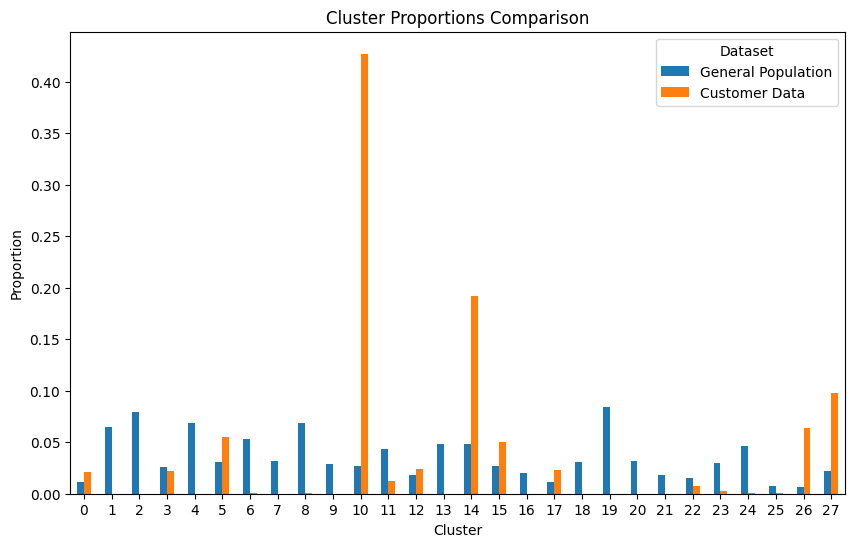

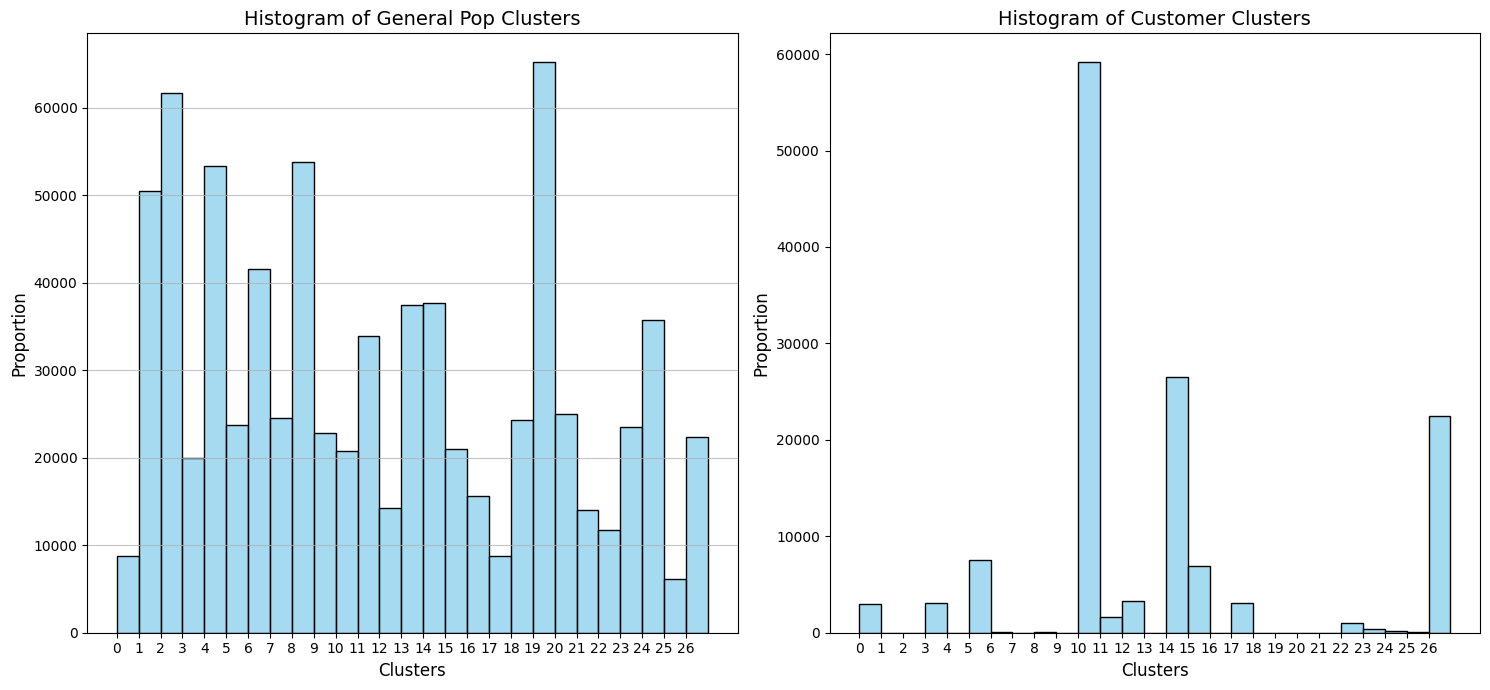

In [172]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.


# Plotting the proportions
comparison.set_index('Cluster').plot(kind='bar', figsize=(10, 6))
plt.title('Cluster Proportions Comparison')
plt.ylabel('Proportion')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.legend(title='Dataset', labels=['General Population', 'Customer Data'])
plt.show()


# ploted a histogram here to see the clusters distribution
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.histplot(final_data['Cluster'], bins=27, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of General Pop Clusters', fontsize=14)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0,27,1))


plt.subplot(1, 2, 2)
sns.histplot(customer_clean_data['Cluster'], bins=27, kde=False, color='skyblue', edgecolor='black')
plt.title('Histogram of Customer Clusters', fontsize=14)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(np.arange(0,27,1))


plt.tight_layout()
plt.show()


In [198]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

# Identify overrepresented clusters
comparison['Difference'] = comparison['Proportion_Customer'] - comparison['Proportion_General']
overrepresented = comparison[comparison['Difference'] > 0]
underrepresented = comparison[comparison['Difference'] < 0]

over_sorted = overrepresented.sort_values(by='Difference', ascending=False)
print("Overrepresented Clusters:")
print(a)


Overrepresented Clusters:
    Cluster  Proportion_General  Proportion_Customer  Difference
10       10            0.026647             0.427294    0.400647
14       14            0.048449             0.191571    0.143122
27       27            0.022098             0.097803    0.075706
26       26            0.006696             0.064170    0.057474
5         5            0.030483             0.054706    0.024223
15       15            0.027015             0.049941    0.022926
17       17            0.011256             0.022588    0.011332
0         0            0.011199             0.021274    0.010075
12       12            0.018281             0.023714    0.005433


In [200]:
cluster_selected = int(over_sorted.iloc[0]['Cluster'])
#centroid12 = final_kmeans.cluster_centers_[cluster_selected]
print("THe cluster selected for analysis is: ", over_sorted.iloc[0]['Cluster'])


filtered_data = original_pop_data_with_clusters[original_pop_data_with_clusters['Cluster'] == cluster_selected]
most_frequent_values = filtered_data.mode().iloc[0]

print(f"Most frequent values for Cluster {cluster_selected}:")
print(most_frequent_values.sort_values(ascending=False))


THe cluster selected for analysis is:  10.0
Most frequent values for Cluster 10:
MIN_GEBAEUDEJAHR                                       1992.0
GEBURTSJAHR                                            1967.0
KBA13_ANZAHL_PKW                                       1400.0
ALTER_HH                                                 18.0
Cluster                                                  10.0
                                                        ...  
PJ_Generation_generation 68 / student protestors          0.0
PJ_Generation_opponents to the building of the Wall       0.0
PJ_Generation_peace movement                              0.0
PJ_Generation_reconstruction years                        0.0
PJ_Generation_war years                                   0.0
Name: 0, Length: 155, dtype: float64


In [202]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

print("\nUnderrepresented Clusters:")
print(underrepresented.sort_values(by='Difference', ascending=True))



Underrepresented Clusters:
    Cluster  Proportion_General  Proportion_Customer  Difference
19       19            0.083840             0.000123   -0.083717
2         2            0.079286             0.000116   -0.079170
8         8            0.069125             0.000339   -0.068786
4         4            0.068476             0.000051   -0.068425
1         1            0.064884             0.000072   -0.064812
6         6            0.053414             0.000722   -0.052692
24       24            0.046003             0.000975   -0.045028
11       11            0.043630             0.011955   -0.031675
23       23            0.030189             0.002909   -0.027279
22       22            0.015092             0.007363   -0.007728
25       25            0.007862             0.000383   -0.007479
3         3            0.025624             0.021931   -0.003692


### Discussion 3.3: Compare Customer Data to Demographics Data

Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?

<span style="color: blue;">**My Answer:**</span>

1. Based on the overrepresented columns from the charts we should focus on Cluster 10 as being the most important for us. 
Next in line, the clusters 14, 27 are also important. 

Trying to describe Cluster 10 based on the orginial data before standardization and PCA. 
I extracted a mode = most frequent value of cluster 10 on each attribute. 
THis should give us an idea of who these customers are.

- they live in a house from 1992
- born in 1962
- live in PKW area
- the house owner is born between 1980 - 1984
- single top earners of higher age
- Connoisseurs
- top earners
- live in the same house for more than 9 years


Also it seems that Cluster 19 is the fartest away from our target audience. 
So we should never waste money on that cluster. 


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.